In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from scipy.stats import randint as sp_randint
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

## Load data

In [2]:
## Load data

gss = pd.read_csv('../../GSS_2012/ICPSR_35478/DS0001/35478-0001-Data.tsv', sep='\t')
print(gss.shape)
gss.head()

(4820, 1069)


,YEAR,ID,INTID,FEEUSED,FEELEVEL,DATEINTV,LNGTHINV,INTAGE,INTETHN,MODE,...,SAMPCODE,SAMPLE,OVERSAMP,WTSS,WTSSNR,WTSSALL,WTCOMB,WTCOMBNR,VSTRAT,VPSU
0,2012,1,49,1,75,721,69,60,1,1,...,601,10,1,2.621963,2.869532,2.621963,6.402159,7.006659,-1,-1
1,2012,2,150,1,75,624,53,32,1,1,...,601,10,1,3.495950,3.826043,3.495950,6.514477,7.129583,-1,-1
2,2012,3,150,1,75,627,77,32,1,1,...,601,10,1,1.747975,1.913021,1.747975,1.671130,1.828920,-1,-1
3,2012,4,49,1,20,527,78,60,1,1,...,601,10,1,1.235694,1.352370,1.235694,1.181370,1.292917,-1,-1
4,2012,5,235,1,75,620,149,62,1,1,...,601,10,1,0.873988,0.956511,0.873988,0.835565,0.914460,-1,-1


## Select useful features manually

In [3]:
## Most useful features with majority responses

gss_select = pd.DataFrame({
    'age': gss['AGE'], #p60
    'yob': gss['COHORT'],
    'sex': gss['SEX'], #p87
    'race': gss['RACECEN1'], #p291
    'children': gss['CHILDS'], #p59
    'age_1st_child': gss['AGEKDBRN'], #P62
    'sex_orient': gss['SEXORNT'], #p277
    'siblings': gss['SIBS'], #p58
    'region': gss['REGION'], #p103
    'place_size_000s': gss['SIZE'], #p105
    'place_size': gss['XNORCSIZ'], #p104
    'beltcode': gss['SRCBELT'], #p105
    'work_status': gss['WRKSTAT'],
    'hours': gss['HRS1'], #p.21
    'self_employed': gss['WRKSLF'],
    'occupation': gss['OCC10'],
    'income': gss['RINCOME'], #p100
    'income_granular': gss['RINCOM06'], #p102
    'highest_school': gss['EDUC'], #p64
    'highest_degree': gss['DEGREE'], #p68
    'major': gss['MAJOR1'], #p70
    'residence_16' : gss['RES16'], #p88
    'region_16': gss['REG16'], #p89
    'family_16': gss['FAMILY16'], #90
    'live_who_16': gss['FAMDIF16'], #91
    'fam_income_16': gss['INCOM16'], #92
    'relig_raised': gss['RELIG16'], #p.186
    'geo_mobility': gss['MOBILE16'], #p90
    'mother_employed': gss['MAWRKGRW'], #92
    'father_school': gss['PAEDUC'], #p65
    'mother_school': gss['MAEDUC'], #p66
    'father_degree': gss['PADEG'], #p68
    'mother_degree': gss['MADEG'], #p69
    'father_occupation': gss['PAOCC10'], #p.45
    'mother_occupation': gss['MAOCC10'], #p51
    'father_self_employed': gss['PAWRKSLF'], #p.45
    'mother_self_employed': gss['MAWRKSLF'], #p51
    'class': gss['CLASS'], #p.236
    'happiness': gss['HAPPY'], #p210
    'pol_party': gss['PARTYID'], #p140
    'pol_views': gss['POLVIEWS'], #p142
    'vote_2008': gss['VOTE08'], #p140
    'pres_2008': gss['PRES08'], #p141
    'if_pres_2008': gss['IF08WHO'], #P141
    'religion': gss['RELIG'], #p.175
    'religion_strength': gss['RELITEN'], #p183
    'fundamentalist': gss['FUND'], #p182
    'rel_attend': gss['ATTEND'], #p182
    'rel_person': gss['RELPERSN'],
    'spi_person': gss['SPRTPRSN'],
    'post_life': gss['POSTLIFE'], #p184
    'pray': gss['PRAY'], #p184
    'bible': gss['BIBLE'], #p206
    'god': gss["GOD"],
    'born_again': gss['REBORN'],
    'save_soul': gss['SAVESOUL'],
    'rel_activities': gss['RELACTIV'],
    'op_road': gss['NATROAD'], #p149
    'op_socsec': gss['NATSOC'], #p150
    'op_masstrans': gss['NATMASS'], #p151
    'op_parks': gss['NATPARK'], #p152
    'op_childcare': gss['NATCHLD'], #p153
    'op_scires': gss['NATSCI'], #p154
    'op_cappun': gss['CAPPUN'], #p173
    'op_gunlaws': gss['GUNLAW'], #173
    'op_criminals': gss['COURTS'] #p174
    
})

In [4]:
## Features that might have label leakage

gss_may_hint = pd.DataFrame({
    'dwelling_type': gss['DWELLING'] #p295

})

In [5]:
## Outcome variable

gss_marital_status = pd.DataFrame({
    'marital_status' : gss['MARITAL'],
    'ever_divorced' : gss['DIVORCE'],
    'ever_widowed' : gss['WIDOWED']
})

In [6]:
## marital_status: 1-Married, 2-Widowed, 3-Divorced, 4-Separated, 5-Never married, 9-No answer
## ever_divorced: 1-Yes, 2-No, 0-Inapplicable, 8-Don't know, 9-No answer
## ever_widowed: 1-Yes, 2-No, 0-Inapplicable, 8-Don't know, 9-No answer
gss_marital_status.head()

,marital_status,ever_divorced,ever_widowed
0,5,0,0
1,5,0,0
2,1,2,2
3,1,1,2
4,4,0,2


In [7]:
## Create binary outcome variable

gss_divsep = pd.DataFrame({
    'ever_divsep': np.where(gss_marital_status['marital_status'].isin([3, 4]), 1, 0) + np.where(gss_marital_status['ever_divorced'] == 1, 1, 0)
})

In [8]:
gss_divsep.head()

,ever_divsep
0,0
1,0
2,0
3,1
4,1


In [9]:
## Select those who were ever married - 1, 2, 3 or 4.
## Widowed might have divorced later - but married might divorce later too.

gss_ever_married = pd.DataFrame({
    'ever_married': np.where(gss_marital_status['marital_status'].isin([1, 2, 3, 4]), 1, 0)
})

In [10]:
## Why so many non responses for income?

gss_income = gss.loc[gss['RINCOM06'] == 0, ]

In [11]:
gss_income.VERSION.value_counts()

2    619
3    577
1    566
Name: VERSION, dtype: int64

In [12]:
gss_income.SAMPTYPE.value_counts()

2012    723
2010    567
2008    472
Name: SAMPTYPE, dtype: int64

## Create features and record NAs

In [13]:
## Create features and record NAs

In [14]:
dummies_needed = []
gss_features = pd.DataFrame()
gss_nas = pd.DataFrame({
    'variable': gss_select.columns,
    'inapplicable': np.nan,
    'dont_know': np.nan,
    'no_answer': np.nan
})

gss_nas.set_index(['variable'], drop=True, inplace=True)
gss_nas.head()

,inapplicable,dont_know,no_answer
variable,,,
age,NaN,NaN,NaN
yob,NaN,NaN,NaN
sex,NaN,NaN,NaN
race,NaN,NaN,NaN
children,NaN,NaN,NaN


In [15]:
## Filling in gss_nas

def fill_gn(row, col, value):
    gss_nas.loc[row, col] = (gss_select[row] == value).sum()
    

#### Age

In [16]:
## Fill in NAs
gss_nas.loc['age', 'dont_know'] = (gss_select['age'] == 98).sum()
fill_gn('age', 'no_answer', 99)

## Create feature with NAs
gss_features['age'] = np.where(gss_select['age'] == 99, np.nan, gss_select['age'])

## Display results
print(gss_nas.head())
print(gss_features.head())

          inapplicable  dont_know  no_answer
variable                                    
age                NaN        0.0       51.0
yob                NaN        NaN        NaN
sex                NaN        NaN        NaN
race               NaN        NaN        NaN
children           NaN        NaN        NaN
    age
0  22.0
1  21.0
2  42.0
3  49.0
4  70.0


#### YOB

In [17]:
## Ignoring this as duplicates age

#### Sex (p.87)

In [18]:
## 1-Male, 2-Female in survey
## Code to 0-Female, 1-Male

gss_features['sex'] = np.where(gss_select['sex'] == 2, 0, 1)

#### Race (p.291)

In [19]:
fill_gn('race', 'dont_know', 98)
fill_gn('race', 'no_answer', 99)

## If less than 1% code as other
race_dict = {
    1: 'white',
    2: 'black',
    3: 'american_indian',
    4: 'other', #'asian indian', 
    5: 'other', #'chinese', 
    6: 'other', #'filipino', 
    7: 'other', #'japanese', 
    8: 'other', #'korean', 
    9: 'other', # vietnamese
    10: 'other', #other asian 
    11: 'other', #native hawaiian 
    12: 'other', #Guamanian or Chamorro 
    13: 'other', #Samoan 
    14: 'other', #Other pacific islander 
    15: 'other', #another race 
    16: 'hispanic', 
    98: 'other',
    99: 'other'
}

gss_features['race'] = gss_select['race'].replace(race_dict)
dummies_needed.append('race')

## Can code 98 and 99 as 'other' because if obvious interviewer codes it.

#### Children p.59

In [20]:
fill_gn('children', 'dont_know', 9)

children_dict = {
    9: np.nan
}
gss_features['children'] = gss_select['children'].replace(children_dict)

#### Age 1st child p.62

In [21]:
fill_gn('age_1st_child', 'dont_know', 98)
fill_gn('age_1st_child', 'no_answer', 99)

## Can't have continuous variable because not applicable to everyone

age_child_dict = {
    0: 'not_applicable',
    20: 'under_21',
    25: '21_to_25',
    30: '26_to_30',
    35: '31_to_35',
    95: 'over_35',
    98: np.nan,
    99: np.nan
    
}

gss_age_child = pd.DataFrame()
gss_age_child['age_child'] = gss_select['age_1st_child']
gss_age_child['age_child_summary'] = gss_age_child['age_child']

for age in age_child_dict:
    for row in np.arange(0, len(gss_age_child)):
        if(isinstance(gss_age_child.loc[row, 'age_child_summary'], str)): 
            continue
        if(gss_age_child.loc[row, 'age_child_summary'] <= age): 
                gss_age_child.loc[row, 'age_child_summary'] = age_child_dict[age]
    
gss_features['age_1st_child'] = gss_age_child['age_child_summary']
dummies_needed.append('age_1st_child')

#### Sexual orientation p.277

In [22]:
## Don't include as 85% straight and 10% inapplicable, so a lot of missing data

#### Siblings p.58

In [23]:
fill_gn('siblings', 'dont_know', 98)
fill_gn('siblings', 'no_answer', 99)
gss_features['siblings'] = np.where(gss_select['siblings'].isin([98, 99]), np.nan, gss_select['siblings'])

#### Region p.103

In [24]:
region_dict = {
    1: 'New_England',
    2: 'Middle_Atlantic',
    3: 'East_North_Central',
    4: 'West_North_Central',
    5: 'South_Atlantic',
    6: 'East_South_Central',
    7: 'West_South_Central',
    8: 'Mountain',
    9: 'Pacific',
    0: np.nan
}

fill_gn('region', 'no_answer', 0)

gss_features['region'] = gss_select['region'].replace(region_dict)

dummies_needed.append('region')

#### Place size 000s p.105

In [25]:
gss_select.loc[gss_select['place_size_000s'] <0,]

,age,yob,sex,race,children,age_1st_child,sex_orient,siblings,region,place_size_000s,...,rel_activities,op_road,op_socsec,op_masstrans,op_parks,op_childcare,op_scires,op_cappun,op_gunlaws,op_criminals


In [26]:
## No missing values (-1) so no cleaning needed

gss_features['place_size_000s'] = gss_select['place_size_000s']

#### Place size p.104

In [27]:
## Not used - replicates previous

#### Beltcode p.105

In [28]:
## Use this to code urban / suburban / countryside

urban_dict = {
    1: 'urban',
    2: 'urban',
    3: 'suburban',
    4: 'suburban',
    5: 'urban',
    6: 'rural', 
}

gss_features['beltcode'] = gss_select['beltcode'].replace(urban_dict)

dummies_needed.append('beltcode')

#### Work status p.20

In [29]:
## Potential leakage here from keeping house and part time. Ignore.

#### Hours worked last week p.21

In [30]:
## -1 is inapplicable, 98 is don't know, 99 is no answer

fill_gn('hours', 'inapplicable', -1)
fill_gn('hours', 'dont_know', 98)
fill_gn('hours', 'no_answer', 99)

gss_features['hours_worked'] = gss_select['hours']

gss_features.loc[gss_features['hours_worked'] == -1, 'hours_worked'] = 0

gss_features.loc[gss_features['hours_worked'].isin([98,99]), 'hours_worked'] = np.nan


#### Self employed p.25

In [31]:
## Only 131 inapplicables doesn't make sense with work status results.
## Leave out.

#### Occupation p.26

In [32]:
## The numbers do not tally with the totals for each occupation in 
## appendix F. Maybe Appendix F doesn't include all panels?

len(gss['OCC10'].unique())

421

In [33]:
occs = gss_select['occupation'].value_counts().to_frame('counts').sort_values('counts', ascending=False)
occs['percentage'] = occs['counts'] / occs['counts'].sum()
occs.loc[occs['percentage'] > 0.015,]

,counts,percentage
5700,145,0.030083
0,131,0.027178
4760,110,0.022822
4220,110,0.022822
3600,108,0.022407
2310,101,0.020954
9130,96,0.019917
3255,96,0.019917
430,94,0.019502
5240,76,0.015768


In [34]:
## Too small, would create noise - code by general occupation area.

occ_dict = {
    0: 'none',
    430: 'manager',
    950: 'business',
    1240: 'computers_maths',
    1560: 'engineering',
    1965: 'science',
    2060: 'social_services',
    2160: 'legal',
    2550: 'education',
    2960: 'arts',
    3540: 'healthcare_technical',
    3600: 'healthcare_support',
    3955: 'protective_services',
    4160: 'food_prep_serving',
    4250: 'cleaning_maintenance',
    4650: 'personal_care',
    4965: 'sales',
    5940: 'administrative_support',
    6130: 'farming_fishing_forestry',
    6940: 'construction',
    7630: 'installation',
    8965: 'production',
    9750: 'transportation',
    9830: 'military',
    9999: np.nan
    
}

gss_occs = pd.DataFrame()
gss_occs['occs'] = gss_select['occupation']
gss_occs['occs_summary'] = gss_occs['occs']

for occ in occ_dict:
    for row in np.arange(0, len(gss_occs)):
        if(isinstance(gss_occs.loc[row, 'occs_summary'], str)): 
            continue
        if(gss_occs.loc[row, 'occs_summary'] <= occ): 
                gss_occs.loc[row, 'occs_summary'] = occ_dict[occ]
    
gss_features['occupation'] = gss_occs['occs_summary']
dummies_needed.append('occupation')

In [35]:
gss_occs['occs_summary'].value_counts()

administrative_support      609
manager                     458
sales                       419
production                  353
education                   339
food_prep_serving           246
transportation              242
cleaning_maintenance        234
healthcare_technical        223
construction                206
business                    203
personal_care               145
protective_services         134
none                        131
installation                123
healthcare_support          108
computers_maths             103
military                     97
arts                         88
engineering                  87
social_services              81
legal                        42
farming_fishing_forestry     41
science                      41
Name: occs_summary, dtype: int64

#### Income p.102

In [36]:
## Use mid point of ranges

income_dict = {
    1: 500,
    2: 1500,
    3: 3500,
    4: 4500,
    5: 5500,
    6: 6500,
    7: 7500,
    8: 9000,
    9: 11250,
    10: 13750,
    11: 16250,
    12: 18750,
    13: 21250,
    14: 23750,
    15: 27500,
    16: 32500,
    17: 37500,
    18: 45000,
    19: 55000,
    20: 67500,
    21: 82500,
    22: 100000,
    23: 120000,
    24: 140000,
    25: 160000 #guess because uncapped
}

In [37]:
## 1762 inapplicable, 170 refused and 98 don't know. 
## Impute using logical rules.


## Separate the complete from the incomplete
## The complete are used to predict the incomplete

gss_income_impute = gss_select.loc[gss_select['income_granular'].isin([0, 26, 98]), ['age', 'occupation', 'income_granular', 'hours']]
gss_income_impute['occs_summary'] = gss_occs.loc[gss_occs.index.isin(gss_income_impute.index), 'occs_summary']
gss_income_complete = gss_select.loc[~gss_select.index.isin(gss_income_impute.index), ]
gss_income_complete['occs_summary'] = gss_occs.loc[gss_occs.index.isin(gss_income_complete.index), 'occs_summary']
gss_income_impute.reset_index(inplace=True)
gss_income_impute.rename(columns={'index': 'old_index'}, inplace=True)
gss_income_complete.reset_index(inplace=True)
gss_income_complete.rename(columns={'index': 'old_index'}, inplace = True)
gss_income_impute['income_impute'] = np.nan

gss_income_complete['income_granular'] = gss_income_complete['income_granular'].replace(income_dict)
gss_income_complete.loc[gss_income_complete['hours'].isin([-1, 98, 99]), 'hours'] = np.nan
gss_income_impute.loc[gss_income_impute['hours'].isin([-1, 98, 99]), 'hours'] = np.nan
gss_income_complete['income_per_hourwk'] = gss_income_complete['income_granular'] / gss_income_complete['hours']

len(gss_income_impute.loc[gss_income_impute['income_impute'].isnull(), ])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

1988

In [38]:
gss_income_impute.head()

,old_index,age,occupation,income_granular,hours,occs_summary,income_impute
0,0,22,4800,0,15.0,sales,NaN
1,1,21,2900,0,30.0,arts,NaN
2,3,49,800,0,NaN,business,NaN
3,4,70,3800,0,NaN,protective_services,NaN
4,5,50,1300,0,NaN,engineering,NaN


In [39]:
gss_income_complete.income_per_hourwk.isnull().value_counts()

False    2468
True      364
Name: income_per_hourwk, dtype: int64

In [40]:
occ_counts = pd.DataFrame(gss_income_complete['occupation'].value_counts())
occ_counts.head()

,occupation
4760,65
430,65
4220,65
3255,63
5700,62


In [41]:
occ_counts_age = pd.DataFrame(gss_income_complete.groupby(['age'])['occupation'].value_counts())
occ_counts_age.columns = ['counts']
occ_counts_age.reset_index(inplace=True)
occ_counts_age['age_occ'] = occ_counts_age['age'].astype('str') +'_'+ occ_counts_age['occupation'].astype('str')
occ_counts_age.head()

,age,occupation,counts,age_occ
0,18,4050,1,18_4050
1,18,4610,1,18_4610
2,18,5240,1,18_5240
3,18,5400,1,18_5400
4,18,7630,1,18_7630


In [42]:
## Is there someone with same job?

gss_income_impute['same_job'] = np.nan

for row in np.arange(0, len(gss_income_impute)):
    try:
        if(occ_counts.loc[gss_income_impute.loc[row, 'occupation'], ].item() > 0):
            gss_income_impute.loc[row, 'same_job'] = True
    except KeyError:
        continue
    
gss_income_impute.head(10)

,old_index,age,occupation,income_granular,hours,occs_summary,income_impute,same_job
0,0,22,4800,0,15.0,sales,NaN,True
1,1,21,2900,0,30.0,arts,NaN,True
2,3,49,800,0,NaN,business,NaN,True
3,4,70,3800,0,NaN,protective_services,NaN,True
4,5,50,1300,0,NaN,engineering,NaN,True
5,6,35,4760,0,NaN,sales,NaN,True
6,7,24,0,0,NaN,none,NaN,NaN
7,8,28,0,0,NaN,none,NaN,NaN
8,10,55,6200,0,NaN,construction,NaN,True
9,12,28,0,0,NaN,none,NaN,NaN


In [43]:
## Now do same job and same age

gss_income_impute['same_age_and_job'] = np.nan

for row in np.arange(0, len(gss_income_impute)):
    row_ind = gss_income_impute.loc[row, 'age'].astype('str') + '_' + gss_income_impute.loc[row, 'occupation'].astype('str')
    if(occ_counts_age.loc[occ_counts_age['age_occ'] == row_ind, 'counts'].empty):
        continue
    elif(occ_counts_age.loc[occ_counts_age['age_occ'] == row_ind, 'counts'].item() > 0):
        gss_income_impute.loc[row, 'same_age_and_job'] = True

In [44]:
len(gss_income_impute.loc[gss_income_impute['same_age_and_job'] == True])

441

In [45]:
## Now do same job and similar age (+/- 3 years)

gss_income_impute['sim_age_same_job'] = np.nan

for row in np.arange(2, len(gss_income_impute)):
    for age in np.arange(gss_income_impute.loc[row, 'age'].item() - 3, gss_income_impute.loc[row, 'age'].item() + 4):
        if(gss_income_impute.loc[row, 'sim_age_same_job'] == True):
            continue
        else:
            row_ind = age.astype('str') + '_' + gss_income_impute.loc[row, 'occupation'].astype('str')
            if(occ_counts_age.loc[occ_counts_age['age_occ'] == row_ind, 'counts'].empty):
                continue
            elif(occ_counts_age.loc[occ_counts_age['age_occ'] == row_ind, 'counts'].item() > 0):
                gss_income_impute.loc[row, 'sim_age_same_job'] = True

## Now do same job and similar age but +/- 10 years

gss_income_impute['sim_age_same_job_20'] = np.nan

for row in np.arange(2, len(gss_income_impute)):
    for age in np.arange(gss_income_impute.loc[row, 'age'].item() - 10, gss_income_impute.loc[row, 'age'].item() + 11):
        if(gss_income_impute.loc[row, 'sim_age_same_job_20'] == True):
            continue
        else:
            row_ind = age.astype('str') + '_' + gss_income_impute.loc[row, 'occupation'].astype('str')
            if(occ_counts_age.loc[occ_counts_age['age_occ'] == row_ind, 'counts'].empty):
                continue
            elif(occ_counts_age.loc[occ_counts_age['age_occ'] == row_ind, 'counts'].item() > 0):
                gss_income_impute.loc[row, 'sim_age_same_job'] = True

In [46]:
print(gss_income_impute.loc[gss_income_impute['sim_age_same_job']==True,].shape)
gss_income_impute.loc[gss_income_impute['occupation'] == 4020, ].head()

(1391, 11)


,old_index,age,occupation,income_granular,hours,occs_summary,income_impute,same_job,same_age_and_job,sim_age_same_job,sim_age_same_job_20
324,811,72,4020,0,NaN,food_prep_serving,NaN,True,NaN,True,NaN
438,1106,23,4020,0,20.0,food_prep_serving,NaN,True,True,True,NaN
510,1256,29,4020,0,25.0,food_prep_serving,NaN,True,True,True,NaN
526,1285,22,4020,0,NaN,food_prep_serving,NaN,True,True,True,NaN
577,1418,33,4020,0,NaN,food_prep_serving,NaN,True,NaN,True,NaN


In [47]:
## Imputing the income

gss_income_impute['income_impute'] = np.nan

## 9810 is first line enlisted military supervisors - lots missing
## Average salary is $63,738 : https://datausa.io/profile/soc/552010/
## Code as $67,500 as within that band
gss_income_impute.loc[gss_income_impute['occupation'] == 9810, 'income_impute'] = 67500

## If no hours then zero pay
gss_income_impute.loc[gss_income_impute['occupation'].isin([0, 9999]), 'income_impute'] = 0

## If same age and job then same income, weighted by hours
for row in np.arange(2, len(gss_income_impute)):
    if (np.isnan(gss_income_impute.loc[row, 'income_impute'])):
        age = gss_income_impute.loc[row, 'age'].item()
        occ = gss_income_impute.loc[row, 'occupation'].item()
        if(gss_income_impute.loc[row, 'same_age_and_job'] == True):
            replicate_df = gss_income_complete.loc[(gss_income_complete['age'] == age) & (gss_income_complete['occupation'] == occ), ]
            replicate_df.dropna(subset=['hours'], inplace=True)
            av_income_per_hourwk = replicate_df['income_per_hourwk'].mean()
            av_hours = replicate_df['hours'].mean()
            if(np.isnan(gss_income_impute.loc[row, 'hours'])):
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * av_hours
            else:
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * gss_income_impute.loc[row, 'hours'].item()


## If similar age and same job then same income, weighted by hours
for row in np.arange(0, len(gss_income_impute)):
    if(np.isnan(gss_income_impute.loc[row, 'income_impute'])):
        ages = np.arange(gss_income_impute.loc[row, 'age'].item() - 3, gss_income_impute.loc[row, 'age'].item() +4)
        occ = gss_income_impute.loc[row, 'occupation'].item()
        if(gss_income_impute.loc[row, 'sim_age_same_job'] == True):
            replicate_df = gss_income_complete.loc[(gss_income_complete['age'].isin(ages)) & (gss_income_complete['occupation'] == occ), ]
            replicate_df.dropna(subset=['hours'], inplace=True)
            av_income_per_hourwk = replicate_df['income_per_hourwk'].mean()
            av_hours = replicate_df['hours'].mean()
            if(np.isnan(gss_income_impute.loc[row, 'hours'])):
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * av_hours
            else:
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * gss_income_impute.loc[row, 'hours'].item()

                
## If age within 20 yrs and same job then same income, weighted by hours
for row in np.arange(0, len(gss_income_impute)):
    if(np.isnan(gss_income_impute.loc[row, 'income_impute'])):
        ages = np.arange(gss_income_impute.loc[row, 'age'].item() - 10, gss_income_impute.loc[row, 'age'].item() +11)
        occ = gss_income_impute.loc[row, 'occupation'].item()
        if(gss_income_impute.loc[row, 'sim_age_same_job_20'] == True):
            replicate_df = gss_income_complete.loc[(gss_income_complete['age'].isin(ages)) & (gss_income_complete['occupation'] == occ), ]
            replicate_df.dropna(subset=['hours'], inplace=True)
            av_income_per_hourwk = replicate_df['income_per_hourwk'].mean()
            av_hours = replicate_df['hours'].mean()
            if(np.isnan(gss_income_impute.loc[row, 'hours'])):
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * av_hours
            else:
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * gss_income_impute.loc[row, 'hours'].item()

                
## If same job then same income, weighted by hours
for row in np.arange(0, len(gss_income_impute)):
    if(np.isnan(gss_income_impute.loc[row, 'income_impute'])):
        occ = gss_income_impute.loc[row, 'occupation'].item()
        if(gss_income_impute.loc[row, 'same_job'] == True):
            replicate_df = gss_income_complete.loc[gss_income_complete['occupation'] == occ, ]
            replicate_df.dropna(subset=['hours'], inplace=True)
            av_income_per_hourwk = replicate_df['income_per_hourwk'].mean()
            av_hours = replicate_df['hours'].mean()
            if(np.isnan(gss_income_impute.loc[row, 'hours'])):
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * av_hours
            else:
                gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * gss_income_impute.loc[row, 'hours'].item()

                
## If same job then same income, unable to weight by hours
for row in np.arange(0, len(gss_income_impute)):
    if(np.isnan(gss_income_impute.loc[row, 'income_impute'])):
        occ = gss_income_impute.loc[row, 'occupation'].item()
        if(gss_income_impute.loc[row, 'same_job'] == True):
            replicate_df = gss_income_complete.loc[gss_income_complete['occupation'] == occ, ]
            av_income = replicate_df['income_granular'].mean()
            gss_income_impute.loc[row, 'income_impute'] = av_income

            
## If same industry then same mean income, weighted by hours
for row in np.arange(0, len(gss_income_impute)):
    if(np.isnan(gss_income_impute.loc[row, 'income_impute'].item())):
        industry = gss_income_impute.loc[row, 'occs_summary']
        replicate_df = gss_income_complete.loc[gss_income_complete['occs_summary'] == industry, ]
        replicate_df.dropna(subset=['hours'], inplace=True)
        av_income_per_hourwk = replicate_df['income_per_hourwk'].mean()
        av_hours = replicate_df['hours'].mean()
        if (np.isnan(gss_income_impute.loc[row, 'hours'])):
            gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * av_hours
        else:
            gss_income_impute.loc[row, 'income_impute'] = av_income_per_hourwk * gss_income_impute.loc[row, 'hours'].item()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [48]:
len(gss_income_impute.loc[gss_income_impute['income_impute'].isnull(),])

0

In [49]:
gss_income_impute.head()

,old_index,age,occupation,income_granular,hours,occs_summary,income_impute,same_job,same_age_and_job,sim_age_same_job,sim_age_same_job_20
0,0,22,4800,0,15.0,sales,21207.724567,True,NaN,NaN,NaN
1,1,21,2900,0,30.0,arts,50510.204082,True,NaN,NaN,NaN
2,3,49,800,0,NaN,business,67500.000000,True,True,True,NaN
3,4,70,3800,0,NaN,protective_services,40505.032206,True,NaN,NaN,NaN
4,5,50,1300,0,NaN,engineering,100000.000000,True,NaN,True,NaN


In [50]:
gss_select['imputed_income'] = np.nan

for row in np.arange(0, len(gss_select)):
    if (gss_select.iloc[gss_select.index == row, ].index.item() in gss_income_impute['old_index'].values):
        gss_select.loc[row, 'imputed_income'] = gss_income_impute.loc[gss_income_impute['old_index'] == row, 'income_impute'].item()
    else:
        gss_select.loc[row, 'imputed_income'] = gss_income_complete.loc[gss_income_complete['old_index'] == row, 'income_granular'].item()

In [51]:
gss_select.loc[gss_select['imputed_income'].isnull(), ]

,age,yob,sex,race,children,age_1st_child,sex_orient,siblings,region,place_size_000s,...,op_road,op_socsec,op_masstrans,op_parks,op_childcare,op_scires,op_cappun,op_gunlaws,op_criminals,imputed_income


In [52]:
gss_features['income'] = gss_select['imputed_income']

In [53]:
gss_features.head()

,age,sex,race,children,age_1st_child,siblings,region,place_size_000s,beltcode,hours_worked,occupation,income
0,22.0,1,white,0.0,not_applicable,1.0,New_England,14,suburban,15.0,sales,21207.724567
1,21.0,1,white,0.0,not_applicable,2.0,New_England,14,suburban,30.0,arts,50510.204082
2,42.0,1,hispanic,2.0,31_to_35,1.0,New_England,14,suburban,60.0,engineering,120000.000000
3,49.0,0,white,2.0,21_to_25,2.0,New_England,14,suburban,0.0,business,67500.000000
4,70.0,0,black,3.0,21_to_25,0.0,Middle_Atlantic,24,urban,0.0,protective_services,40505.032206


#### Highest school p.64 and highest degree p.68

In [54]:
## Just use highest degree because school is number of years and
## degree includes those who didn't finish school

gss_select.loc[0:10, ['highest_school', 'highest_degree']]

,highest_school,highest_degree
0,16,3
1,12,1
2,12,1
3,13,1
4,16,3
5,19,3
6,15,2
7,11,0
8,9,0
9,17,3


In [55]:
degree_dict = {
    0: 'dnf_school',
    1: 'high_school',
    2: 'junior_college',
    3: 'bachelor',
    4: 'graduate',
}

gss_features['education'] = gss_select['highest_degree'].replace(degree_dict)
dummies_needed.append('education')

#### Major p.70

In [56]:
## Ignore as only relevant for 700 respondents and likely to overlap
## occupation

#### Residence age 16 p.88

In [57]:
fill_gn('residence_16', 'dont_know', 8)
fill_gn('residence_16', 'no_answer', 9)

residence16_dict = {
    1: 'rural',
    2: 'rural',
    3: 'urban',
    4: 'urban',
    5: 'suburban',
    6: 'urban',
    8: np.nan,
    9: np.nan
}

gss_features['residence_16'] = gss_select['residence_16'].replace(residence16_dict)
dummies_needed.append('residence_16')

#### Region age 16 p.89

In [58]:
region16_dict = {
    1: 'New_England',
    2: 'Middle_Atlantic',
    3: 'East_North_Central',
    4: 'West_North_Central',
    5: 'South_Atlantic',
    6: 'East_South_Central',
    7: 'West_South_Central',
    8: 'Mountain',
    9: 'Pacific',
    0: 'foreign'
}

gss_features['region_16'] = gss_select['region_16'].replace(region16_dict)
dummies_needed.append('region_16')

#### Family age 16 p.90

In [59]:
fill_gn('family_16', 'no_answer', 9)

## Group some categories

family16_dict = {
    0: 'other',
    1: 'both_parents',
    2: 'parent_stepparent',
    3: 'parent_stepparent',
    4: 'single_parent',
    5: 'single_parent',
    6: 'relatives',
    7: 'relatives',
    8: 'relatives',
    9: np.nan
}

gss_features['family_16'] = gss_select['family_16'].replace(family16_dict)
dummies_needed.append('family_16')

#### Why not with parents 16? p 91

In [60]:
fill_gn('live_who_16', 'inapplicable', 0)
fill_gn('live_who_16', 'dont_know', 8)
fill_gn('live_who_16', 'no_answer', 9)

## Code not applicable as string not NA so won't be dropped
## It is a valid category

## Group some categories < 1%
live_who_16_dict = {
    1: 'parent_died',
    2: 'divsep',
    3: 'other',
    4: 'other',
    5: 'other',
    8: 'other',
    9: 'other',
    0: 'not_applicable'
}

gss_features['live_who_16'] = gss_select['live_who_16'].replace(live_who_16_dict)
dummies_needed.append('live_who_16')

#### Family income at 16 p.92

In [61]:
fill_gn('fam_income_16', 'dont_know', 8)
fill_gn('fam_income_16', 'no_answer', 9)

fam_income_16_dict = {
    1: 'far_below_av',
    2: 'below_av',
    3: 'average',
    4: 'above_av',
    5: 'far_above_av',
    8: np.nan,
    9: np.nan
}

gss_features['fam_income_16'] = gss_select['fam_income_16'].replace(fam_income_16_dict)
dummies_needed.append('fam_income_16')

#### Religion raised p.186

In [62]:
## See if religion has changed as got older
## This is to reduce collinearity in these variables as otherwise very collinear

fill_gn('relig_raised', 'dont_know', 98)
fill_gn('relig_raised', 'no_answer', 99)

same_relig_raised = pd.DataFrame()
same_relig_raised['same_relig_raised'] = np.where(gss_select['relig_raised'] == gss_select['religion'], 1, 0)
gss_features['same_relig_raised'] = same_relig_raised['same_relig_raised']

#### Geographic mobility p.90

In [63]:
fill_gn('geo_mobility', 'dont_know', 8)
fill_gn('geo_mobility', 'no_answer', 9)

geomob_dict = {
    1: 'same_city',
    2: 'same_state_diff_city',
    3: 'diff_state',
    8: np.nan,
    9: np.nan
}

gss_features['geo_mobility'] = gss_select['geo_mobility'].replace(geomob_dict)
dummies_needed.append('geo_mobility')

#### Mother's working p.92

In [64]:
## Ignore as feature because 3% missing and will be captured in other
## variables.

#### Father and mother school and degree p.65 and 68

In [65]:
## Ignore school as replicated in degree

fill_gn('father_degree', 'inapplicable', 7)
fill_gn('father_degree', 'dont_know', 8)
fill_gn('father_degree', 'no_answer', 9)

fill_gn('mother_degree', 'inapplicable', 7)
fill_gn('mother_degree', 'dont_know', 8)
fill_gn('mother_degree', 'no_answer', 9)

par_degree_dict = {
    0: 'dnf_school',
    1: 'high_school',
    2: 'junior_college',
    3: 'bachelor',
    4: 'graduate',
    7: 'unknown',
    8: 'unknown',
    9: 'unknown'
}

gss_features['father_ed'] = gss_select['father_degree'].replace(par_degree_dict)
gss_features['mother_ed'] = gss_select['mother_degree'].replace(par_degree_dict)

dummies_needed.append('father_ed')
dummies_needed.append('mother_ed')

#### Father and mother occupations p.45 and 51

In [66]:
fill_gn('father_occupation', 'inapplicable', 0)
fill_gn('father_occupation', 'dont_know', 9998)
fill_gn('father_occupation', 'no_answer', 9999)

fill_gn('mother_occupation', 'inapplicable', 0)
fill_gn('mother_occupation', 'dont_know', 9998)
fill_gn('mother_occupation', 'no_answer', 9999)

par_occ_dict = {
    0: 'unknown', ## don't know if none or if parent not around
    430: 'manager',
    950: 'business',
    1240: 'computers_maths',
    1560: 'engineering',
    1965: 'science',
    2060: 'social_services',
    2160: 'legal',
    2550: 'education',
    2960: 'arts',
    3540: 'healthcare_technical',
    3600: 'healthcare_support',
    3955: 'protective_services',
    4160: 'food_prep_serving',
    4250: 'cleaning_maintenance',
    4650: 'personal_care',
    4965: 'sales',
    5940: 'administrative_support',
    6130: 'farming_fishing_forestry',
    6940: 'construction',
    7630: 'installation',
    8965: 'production',
    9750: 'transportation',
    9830: 'military',
    9999: np.nan
    
}

gss_father_occs = pd.DataFrame()
gss_father_occs['occs'] = gss_select['father_occupation']
gss_father_occs['occs_summary'] = gss_father_occs['occs']

for occ in par_occ_dict:
    for row in np.arange(0, len(gss_father_occs)):
        if(isinstance(gss_father_occs.loc[row, 'occs_summary'], str)): 
            continue
        if(gss_father_occs.loc[row, 'occs_summary'] <= occ): 
                gss_father_occs.loc[row, 'occs_summary'] = par_occ_dict[occ]
    
gss_features['father_occupation'] = gss_father_occs['occs_summary']

gss_mother_occs = pd.DataFrame()
gss_mother_occs['occs'] = gss_select['mother_occupation']
gss_mother_occs['occs_summary'] = gss_mother_occs['occs']

for occ in par_occ_dict:
    for row in np.arange(0, len(gss_mother_occs)):
        if(isinstance(gss_mother_occs.loc[row, 'occs_summary'], str)): 
            continue
        if(gss_mother_occs.loc[row, 'occs_summary'] <= occ): 
                gss_mother_occs.loc[row, 'occs_summary'] = par_occ_dict[occ]
    
gss_features['mother_occupation'] = gss_mother_occs['occs_summary']

dummies_needed.append('father_occupation')
dummies_needed.append('mother_occupation')

#### Self employed father and mother p.45 and 51

In [67]:
## Leave out consistent with respondent

#### Class p.236

In [68]:
fill_gn('class', 'dont_know', 8)
fill_gn('class', 'no_answer', 9)

class_dict = {
    1: 'lower_class', 
    2: 'working_class', 
    3: 'middle_class', 
    4: 'upper_class', 
    8: np.nan,
    9: np.nan
}

gss_features['class'] = gss_select['class'].replace(class_dict)
dummies_needed.append('class')

#### Happiness p.210

In [69]:
fill_gn('happiness', 'dont_know', 8)
fill_gn('happiness', 'no_answer', 9)

happy_dict = {
    8: np.nan,
    9: np.nan
}

gss_features['happy'] = gss_select['happiness'].replace(happy_dict)

#### Political party p.140

In [70]:
fill_gn('pol_party', 'no_answer', 9)

pol_party_dict = {
    0: 'democrat',
    1: 'democrat',
    2: 'independent',
    3: 'independent', 
    4: 'independent', 
    5: 'republican', 
    6: 'republican',
    7: 'other_party',
    8: np.nan
}

gss_features['pol_party'] = gss_select['pol_party'].replace(pol_party_dict)
dummies_needed.append('pol_party')

#### Vote 2008, pres 2008 etc p.140

In [71]:
## Ditch these - captured in political affiliation

#### Religion now p.175

In [72]:
fill_gn('religion', 'dont_know', 98)
fill_gn('religion', 'no_answer', 99)

relig_dict = {
    1: 'protestant',
    2: 'catholic',
    3: 'jewish',
    4: 'none',
    5: 'other',
    6: 'other',
    7: 'other',
    8: 'other',
    9: 'other',
    10: 'christian',
    11: 'christian',
    12: 'other',
    13: 'other',
    98: 'other', 
    99: np.nan
}

gss_features['religion_now'] = gss_select['religion'].replace(relig_dict)
dummies_needed.append('religion_now')

#### Religion strength p.183

In [73]:
fill_gn('religion_strength', 'inapplicable', 0)
fill_gn('religion_strength', 'dont_know', 8)
fill_gn('religion_strength', 'no_answer', 9)

relig_str_dict = {
    0: 4, # Code inapplicable as no religion
    8: np.nan,
    9: np.nan
}

gss_features['relig_strength'] = gss_select['religion_strength'].replace(relig_str_dict)

#### Other religious belief questions

In [74]:
## Drop as mostly covered

#### Belief in life after death p.184

In [75]:
fill_gn('post_life', 'inapplicable', 0)
fill_gn('post_life', 'dont_know', 8)
fill_gn('post_life', 'no_answer', 9)

postlife_dict = {
    1: 'yes',
    2: 'no',
    8: 'maybe', 
    0: np.nan,
    9: np.nan
}

gss_features['postlife'] = gss_select['post_life'].replace(postlife_dict)
dummies_needed.append('postlife')

#### How often pray? p.184

In [76]:
fill_gn('pray', 'dont_know', 8)
fill_gn('pray', 'no_answer', 9)

pray_dict = {
    8: np.nan,
    9: np.nan
}

gss_features['pray'] = gss_select['pray'].replace(pray_dict)

#### Opinion of road spending p.150

In [77]:
fill_gn('op_road', 'dont_know', 8)
fill_gn('op_road', 'no_answer', 9)

road_dict ={
    1: 'too_little',
    2: 'about_right',
    3: 'too_much',
    8: 'dont_know',
    9: np.nan
}

gss_features['op_road'] = gss_select['op_road'].replace(road_dict)
dummies_needed.append('op_road')

#### Opinion of social security spending p.151

In [78]:
fill_gn('op_socsec', 'dont_know', 8)
fill_gn('op_socsec', 'no_answer', 9)

gss_features['op_socsec'] = gss_select['op_socsec'].replace(road_dict)
dummies_needed.append('op_socsec')

#### Opinion on mass transportation p.152

In [79]:
fill_gn('op_masstrans', 'dont_know', 8)
fill_gn('op_masstrans', 'no_answer', 9)

gss_features['op_masstrans'] = gss_select['op_masstrans'].replace(road_dict)
dummies_needed.append('op_masstrans')

#### Opinion on national parks p.152

In [80]:
fill_gn('op_parks', 'dont_know', 8)
fill_gn('op_parks', 'no_answer', 9)

gss_features['op_parks'] = gss_select['op_parks'].replace(road_dict)
dummies_needed.append('op_parks')

#### Opinion on assistance for childcare p.153

In [81]:
fill_gn('op_childcare', 'dont_know', 8)
fill_gn('op_childcare', 'no_answer', 9)

gss_features['op_childcare'] = gss_select['op_childcare'].replace(road_dict)
dummies_needed.append('op_childcare')

#### Opinion on funding scientific research p.154

In [82]:
fill_gn('op_scires', 'dont_know', 8)
fill_gn('op_scires', 'no_answer', 9)

gss_features['op_scires'] = gss_select['op_scires'].replace(road_dict)
dummies_needed.append('op_scires')

#### Opinion on capital punishment p.173

In [83]:
fill_gn('op_cappun', 'dont_know', 8)
fill_gn('op_cappun', 'no_answer', 9)

cappun_dict ={
    1: 'favor',
    2: 'oppose',
    8: 'dont_know',
    9: np.nan
}

gss_features['op_cappun'] = gss_select['op_cappun'].replace(cappun_dict)
dummies_needed.append('op_cappun')

#### Opinion on gun laws p.173

In [84]:
## Too many inapplicables (1669)

#### Opinion on dealing with criminals p.174

In [85]:
fill_gn('op_criminals', 'dont_know', 8)
fill_gn('op_criminals', 'no_answer', 9)

criminals_dict ={
    1: 'too_harsh',
    2: 'not_harsh_enough',
    3: 'about_right',
    8: 'dont_know',
    9: np.nan
}

gss_features['op_criminals'] = gss_select['op_criminals'].replace(criminals_dict)
dummies_needed.append('op_criminals')

## Data features

In [86]:
gss_features.shape

(4820, 39)

In [87]:
gss_features.describe()

,age,sex,children,siblings,place_size_000s,hours_worked,income,same_relig_raised,happy,relig_strength,pray
count,4769.000000,4820.000000,4813.000000,4813.000000,4820.000000,4789.000000,4.820000e+03,4820.000000,4806.000000,4780.000000,4786.00000
mean,49.594674,0.442324,1.921255,3.612300,365.207676,23.995197,4.180506e+04,0.709544,1.847690,2.103556,2.79837
std,17.187426,0.496714,1.665949,3.063221,1269.694296,23.091663,6.155572e+04,0.454020,0.635166,1.099539,1.77610
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.00000
25%,35.000000,0.000000,0.000000,2.000000,7.000000,0.000000,1.375000e+04,0.000000,1.000000,1.000000,1.00000
50%,49.000000,0.000000,2.000000,3.000000,27.000000,25.000000,3.250000e+04,1.000000,2.000000,2.000000,2.00000
75%,62.000000,1.000000,3.000000,5.000000,117.000000,40.000000,5.500000e+04,1.000000,2.000000,3.000000,4.00000
max,89.000000,1.000000,8.000000,58.000000,8175.000000,89.000000,3.375000e+06,1.000000,3.000000,4.000000,6.00000


In [88]:
## 58 siblings is apparently a value

In [89]:
gss_features.describe(include='object')

,race,age_1st_child,region,beltcode,occupation,education,residence_16,region_16,family_16,live_who_16,...,religion_now,postlife,op_road,op_socsec,op_masstrans,op_parks,op_childcare,op_scires,op_cappun,op_criminals
count,4820,4799,4819,4820,4753,4820,4817,4820,4818,4820,...,4809,4805,4819,4811,4814,4818,4807,4815,4774,4789
unique,5,6,9,3,24,5,3,10,5,4,...,6,3,4,4,4,4,4,4,3,4
top,white,not_applicable,South_Atlantic,urban,administrative_support,high_school,urban,East_North_Central,both_parents,not_applicable,...,protestant,yes,too_little,too_little,about_right,about_right,too_little,about_right,favor,not_harsh_enough
freq,3681,1250,1041,2784,609,2394,3155,903,3233,3233,...,2361,3475,2172,2648,2180,2923,2161,2168,2944,2874


### Decide which to drop

In [90]:
gss_features = pd.concat([gss_features, gss_divsep], axis=1)

In [91]:
gss_features.shape

(4820, 40)

In [92]:
## Drop anyone who has never been married
gss_features['marital_status'] = gss_ever_married['ever_married']
gss_features.drop(gss_features.loc[gss_features['marital_status'] == 0].index, axis=0, inplace=True)
gss_features.drop(['marital_status'], axis=1, inplace=True)

In [93]:
gss_features.shape

(3616, 40)

In [94]:
gss_features.isnull().sum()

age                  40
sex                   0
race                  0
children              5
age_1st_child        18
siblings              5
region                1
place_size_000s       0
beltcode              0
hours_worked         14
occupation           49
income                0
education             0
residence_16          2
region_16             0
family_16             1
live_who_16           0
fam_income_16        60
same_relig_raised     0
geo_mobility          9
father_ed             0
mother_ed             0
father_occupation    77
mother_occupation    61
class                30
happy                12
pol_party             0
religion_now         10
relig_strength       35
postlife             10
pray                 28
op_road               0
op_socsec             7
op_masstrans          5
op_parks              0
op_childcare         10
op_scires             3
op_cappun            33
op_criminals         23
ever_divsep           0
dtype: int64

In [95]:
## See how many remaining if drop all null

gss_features_dropna = gss_features.dropna()

In [96]:
gss_features_dropna.shape

(3203, 40)

In [97]:
3203/3616

0.8857853982300885

In [98]:
## Code missing parents' occupations as unknown
gss_features_par = gss_features.copy()
gss_features_par.loc[gss_features_par['father_occupation'].isnull(), 'father_occupation'] = 'unknown'
gss_features_par.loc[gss_features_par['mother_occupation'].isnull(), 'mother_occupation'] = 'unknown'

In [99]:
gss_features_par.dropna(inplace=True)
gss_features_par.shape

(3311, 40)

In [100]:
3311/3616

0.9156526548672567

In [101]:
gss_features = gss_features_par.reset_index(drop=True)

In [102]:
gss_outcome = gss_features['ever_divsep']
gss_features = gss_features.drop(['ever_divsep'], axis=1)

### Code dummies

In [103]:
for var in dummies_needed:
    dummies = pd.get_dummies(gss_features[var]).rename(columns=lambda x: str(var) + '_' + str(x))
    gss_features = pd.concat([gss_features, dummies], axis=1)
    gss_features.drop([var], inplace=True, axis=1)
    

In [104]:
try:
    gss_features.describe(include='object') 
except ValueError:
    print('All dummies made as needed')

All dummies made as needed


In [105]:
gss_features.shape

(3311, 202)

In [106]:
gss_outcome.shape

(3311,)

In [107]:
gss_features.columns

Index(['age', 'sex', 'children', 'siblings', 'place_size_000s', 'hours_worked',
       'income', 'same_relig_raised', 'happy', 'relig_strength',
       ...
       'op_scires_dont_know', 'op_scires_too_little', 'op_scires_too_much',
       'op_cappun_dont_know', 'op_cappun_favor', 'op_cappun_oppose',
       'op_criminals_about_right', 'op_criminals_dont_know',
       'op_criminals_not_harsh_enough', 'op_criminals_too_harsh'],
      dtype='object', length=202)

## Separate into training, validation and testing set

In [108]:
x_train, x_test, y_train, y_test = train_test_split(gss_features,
                                                    gss_outcome,
                                                    test_size=0.20,
                                                    random_state=5322,
                                                    stratify=gss_outcome)

In [109]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train,
                                                                y_train,
                                                                test_size=0.25,
                                                                random_state=5322,
                                                                stratify=y_train)

## Check for collinearity

In [110]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(1986, 202)
(662, 202)
(663, 202)


In [111]:
corr_matrix = x_train.corr().abs()

In [112]:
corr_matrix.shape

(202, 202)

In [113]:
corr_matrix.head()

,age,sex,children,siblings,place_size_000s,hours_worked,income,same_relig_raised,happy,relig_strength,...,op_scires_dont_know,op_scires_too_little,op_scires_too_much,op_cappun_dont_know,op_cappun_favor,op_cappun_oppose,op_criminals_about_right,op_criminals_dont_know,op_criminals_not_harsh_enough,op_criminals_too_harsh
age,1.000000,0.018217,0.256969,0.095215,0.038925,0.428259,0.006205,0.103579,0.057094,0.113214,...,0.014066,0.068297,0.001221,0.026214,0.040463,0.030537,0.070464,0.032278,0.009205,0.078494
sex,0.018217,1.000000,0.010337,0.014178,0.022740,0.197893,0.132631,0.063209,0.002924,0.130083,...,0.035267,0.050265,0.001527,0.090102,0.105992,0.070753,0.042838,0.058902,0.021314,0.028170
children,0.256969,0.010337,1.000000,0.240569,0.045361,0.162348,0.009661,0.068557,0.015803,0.161730,...,0.031039,0.064988,0.045155,0.041200,0.023202,0.006233,0.007577,0.038085,0.027950,0.002285
siblings,0.095215,0.014178,0.240569,1.000000,0.027551,0.056349,0.066073,0.049427,0.054489,0.067247,...,0.028772,0.054233,0.099487,0.002662,0.084228,0.085935,0.040330,0.056502,0.002336,0.103702
place_size_000s,0.038925,0.022740,0.045361,0.027551,1.000000,0.022589,0.014293,0.029294,0.027423,0.020649,...,0.006296,0.013650,0.004197,0.017941,0.062995,0.072862,0.031068,0.020956,0.018890,0.052435


In [114]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [115]:
collinear_features = [column for column in upper.columns if any(upper[column] > 0.70)]

In [116]:
collinear_features

['race_white',
 'beltcode_urban',
 'residence_16_urban',
 'region_16_East_North_Central',
 'region_16_New_England',
 'region_16_West_North_Central',
 'region_16_West_South_Central',
 'live_who_16_not_applicable',
 'father_ed_unknown',
 'father_occupation_unknown',
 'class_working_class',
 'religion_now_none',
 'postlife_yes',
 'op_road_too_little',
 'op_socsec_too_little',
 'op_masstrans_too_little',
 'op_parks_too_little',
 'op_childcare_too_little',
 'op_scires_too_little',
 'op_cappun_oppose']

In [117]:
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

In [118]:
lower.head()

,age,sex,children,siblings,place_size_000s,hours_worked,income,same_relig_raised,happy,relig_strength,...,op_scires_dont_know,op_scires_too_little,op_scires_too_much,op_cappun_dont_know,op_cappun_favor,op_cappun_oppose,op_criminals_about_right,op_criminals_dont_know,op_criminals_not_harsh_enough,op_criminals_too_harsh
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,0.018217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,0.256969,0.010337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
siblings,0.095215,0.014178,0.240569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_size_000s,0.038925,0.022740,0.045361,0.027551,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
collinear_features_a = [column for column in lower.columns if any(lower[column] > 0.70)]

In [120]:
collinear_features_a

['relig_strength',
 'race_black',
 'region_East_North_Central',
 'region_New_England',
 'region_West_North_Central',
 'region_West_South_Central',
 'beltcode_suburban',
 'residence_16_rural',
 'family_16_both_parents',
 'family_16_single_parent',
 'father_ed_unknown',
 'class_middle_class',
 'postlife_no',
 'op_road_about_right',
 'op_socsec_about_right',
 'op_masstrans_about_right',
 'op_parks_about_right',
 'op_childcare_about_right',
 'op_scires_about_right',
 'op_cappun_favor']

In [121]:
most_collinear = corr_matrix.loc[collinear_features_a, collinear_features]

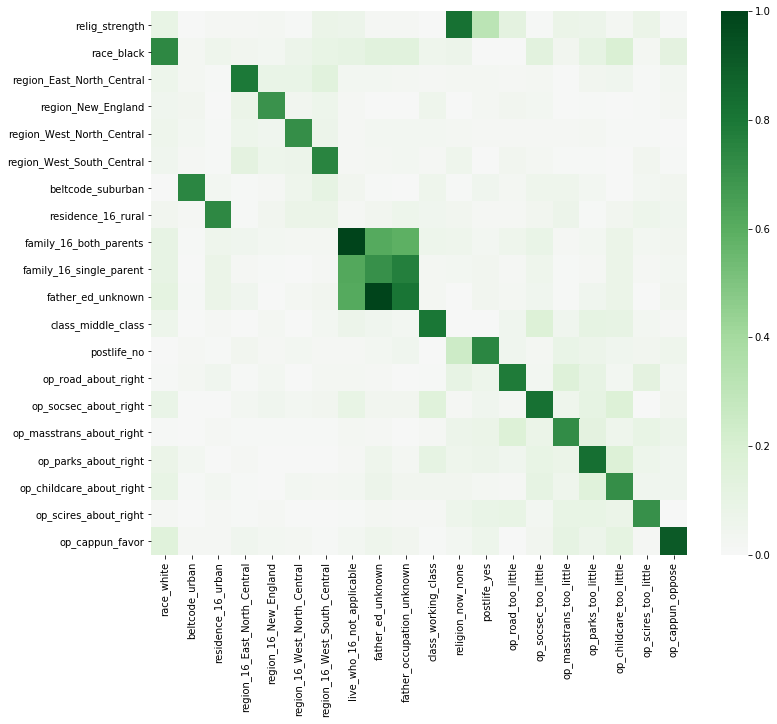

In [122]:
plt.figure(figsize=(12, 10))
sns.heatmap(most_collinear,
           cmap='PRGn',
           center=0)
plt.show()

In [123]:
## Drop things on x axis

## live_who_16_not_applicable is because it's the same as living with both parents - remove.

## Region at 16 very correlated with region now
## Could do a variable to see whether it has changed
## This is already covered in geo mobility
## Drop region at 16 for variables mentioned

## Also drop one answer to each opinion question
## Covered via other answers

## Same for religion now = none
## Same for beltcode urban
## Same for residence 16 urban
## Same for race white
## Same for father ed unknown and father occ unknown
## Same for working class

x_train.drop(columns=collinear_features, inplace=True)
x_validation.drop(columns=collinear_features, inplace=True)
x_test.drop(columns=collinear_features, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


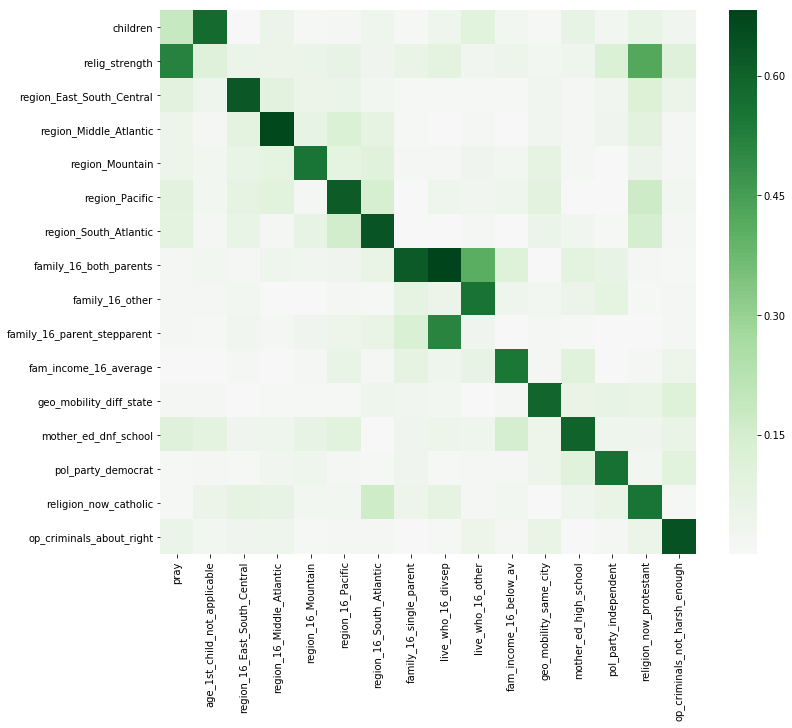

In [124]:
## Could drop variables up to 0.5 correlation
## Leave for now

corr_matrix2 = x_train.corr().abs()
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))
lower2 = corr_matrix2.where(np.tril(np.ones(corr_matrix2.shape), k=-1).astype(np.bool))
collinear_features2 = [column for column in upper2.columns if any(upper2[column] > 0.50)]
collinear_features2a = [column for column in lower2.columns if any(lower2[column] > 0.50)]
most_collinear2 = corr_matrix2.loc[collinear_features2a, collinear_features2]
plt.figure(figsize=(12, 10))
sns.heatmap(most_collinear2,
           cmap='PRGn',
           center=0)
plt.show()

In [125]:
x_train.shape

(1986, 182)

In [126]:
y_train.sum()

892

## Transform continuous variables to be normal shaped

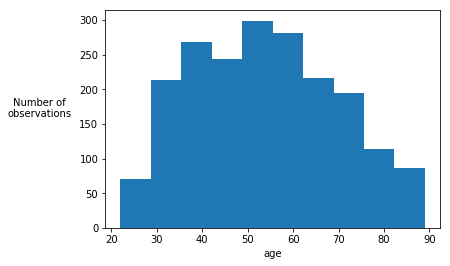

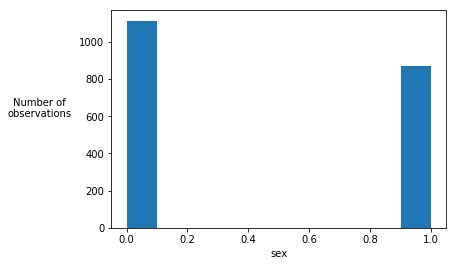

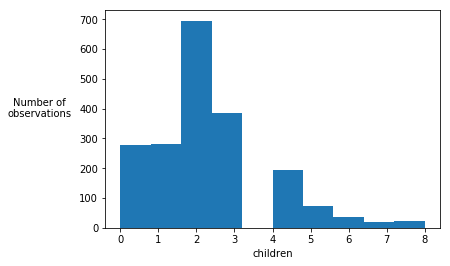

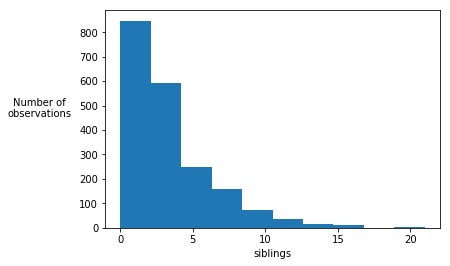

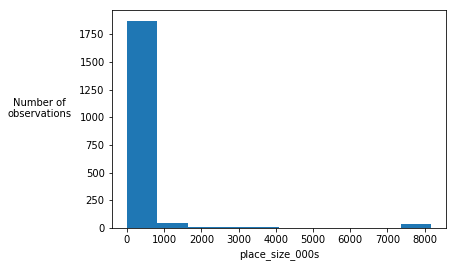

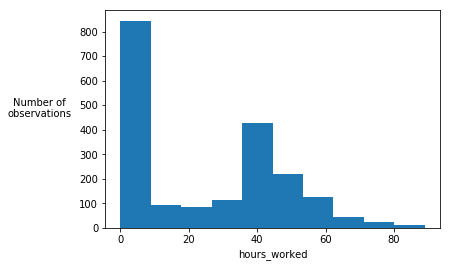

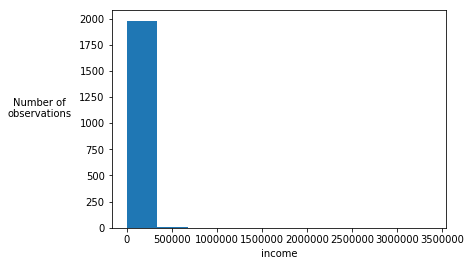

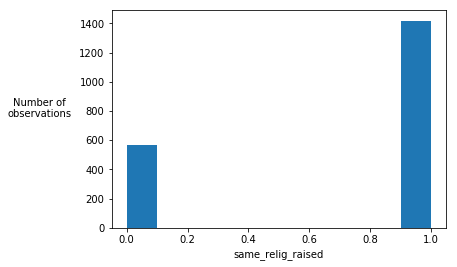

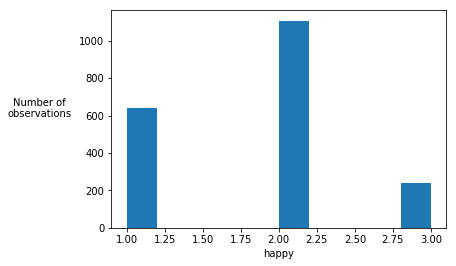

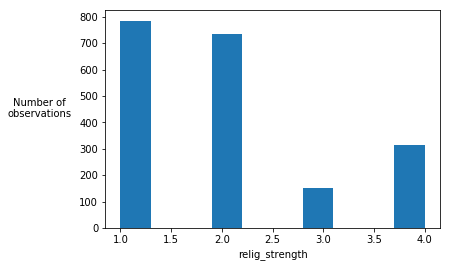

In [127]:
## View continuous variable shapes

for i in np.arange(0, 10):
    plt.hist(x_train.iloc[:, i])
    plt.xlabel(x_train.columns[i])
    plt.ylabel('Number of\nobservations', rotation=0, labelpad=40)
    plt.show()

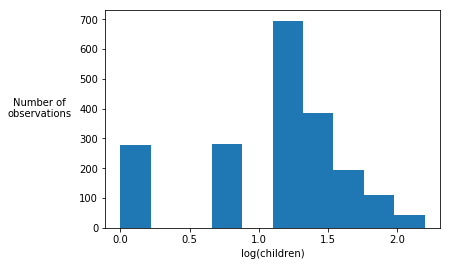

In [128]:
## This looks better

plt.hist(np.log(x_train.loc[:, 'children']+1))
plt.xlabel('log(children)')
plt.ylabel('Number of\nobservations', rotation=0, labelpad=40)
plt.show()

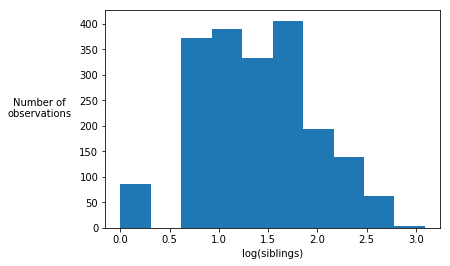

In [129]:
## This looks better

plt.hist(np.log(x_train.loc[:, 'siblings']+1))
plt.xlabel('log(siblings)')
plt.ylabel('Number of\nobservations', rotation=0, labelpad=40)
plt.show()

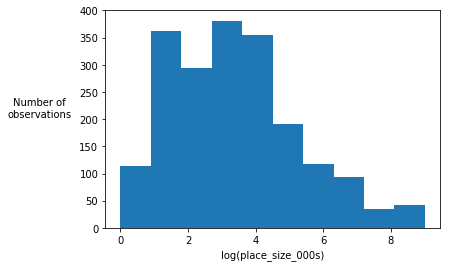

In [130]:
## This looks better

plt.hist(np.log(x_train.loc[:, 'place_size_000s']+1))
plt.xlabel('log(place_size_000s)')
plt.ylabel('Number of\nobservations', rotation=0, labelpad=40)
plt.show()

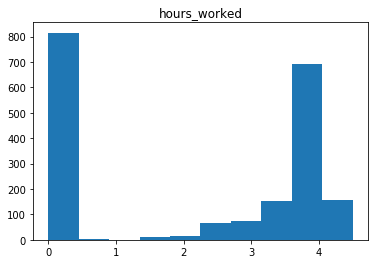

In [131]:
## This does not look better

plt.hist(np.log(x_train.loc[:, 'hours_worked']+1))
plt.title('hours_worked')
plt.show()

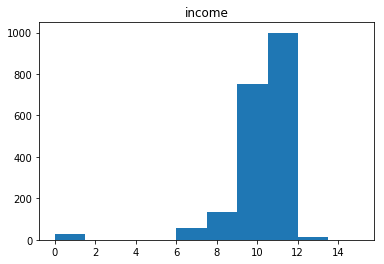

In [132]:
## This looks a little better

plt.hist(np.log(x_train.loc[:, 'income']+1))
plt.title('income')
plt.show()

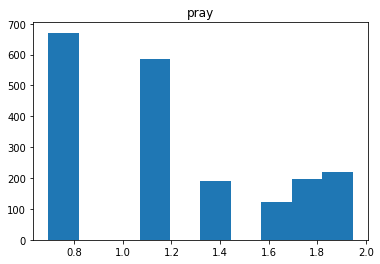

In [133]:
## This does not look better

plt.hist(np.log(x_train.loc[:, 'pray']+1))
plt.title('pray')
plt.show()

In [134]:
## Tranforms to include:

x_train['children_log'] = np.log(x_train['children']+1)
x_train['siblings_log'] = np.log(x_train['siblings']+1)
x_train['place_size_000s_log'] = np.log(x_train['place_size_000s']+1)
x_train['income_log'] = np.log(x_train['income']+1)
x_train.drop(columns=['children', 'siblings', 'place_size_000s', 'income'], inplace=True)

x_validation['children_log'] = np.log(x_validation['children']+1)
x_validation['siblings_log'] = np.log(x_validation['siblings']+1)
x_validation['place_size_000s_log'] = np.log(x_validation['place_size_000s']+1)
x_validation['income_log'] = np.log(x_validation['income']+1)
x_validation.drop(columns=['children', 'siblings', 'place_size_000s', 'income'], inplace=True)

x_test['children_log'] = np.log(x_test['children']+1)
x_test['siblings_log'] = np.log(x_test['siblings']+1)
x_test['place_size_000s_log'] = np.log(x_test['place_size_000s']+1)
x_test['income_log'] = np.log(x_test['income']+1)
x_test.drop(columns=['children', 'siblings', 'place_size_000s', 'income'], inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [135]:
x_train.head()

,age,sex,hours_worked,same_relig_raised,happy,relig_strength,pray,race_american_indian,race_black,race_hispanic,...,op_cappun_dont_know,op_cappun_favor,op_criminals_about_right,op_criminals_dont_know,op_criminals_not_harsh_enough,op_criminals_too_harsh,children_log,siblings_log,place_size_000s_log,income_log
3216,57.0,1,6.0,1,2.0,2.0,5.0,0,0,0,...,0,1,1,0,0,0,1.386294,1.098612,1.386294,8.779711
1928,48.0,1,40.0,1,2.0,1.0,2.0,1,0,0,...,0,1,0,0,1,0,0.693147,1.791759,5.513429,10.714440
3143,59.0,1,50.0,0,1.0,3.0,2.0,0,0,0,...,0,1,1,0,0,0,1.386294,1.791759,1.098612,11.512935
36,41.0,0,36.0,0,2.0,3.0,1.0,0,1,0,...,0,1,0,0,1,0,0.693147,1.386294,9.008958,9.695910
2368,66.0,0,0.0,1,2.0,1.0,5.0,0,0,0,...,0,0,1,0,0,0,0.000000,1.386294,4.110874,10.767301


## Data variations

### Scaling

#### StandardScaler
This is a standardization scaler - all variables mean 0 var 1.

In [136]:
standard_scaler = preprocessing.StandardScaler().fit(x_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [137]:
standard_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
x_train_ss = standard_scaler.transform(x_train)
x_validation_ss = standard_scaler.transform(x_validation)
x_test_ss = standard_scaler.transform(x_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


#### MinMaxScaler
This is a normalization scaler - all variables in range 0 to 1.

In [139]:
min_max_scaler = preprocessing.MinMaxScaler().fit(x_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [140]:
min_max_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [141]:
x_train_mm = min_max_scaler.transform(x_train)
x_validation_mm = min_max_scaler.transform(x_validation)
x_test_mm = min_max_scaler.transform(x_test)

In [142]:
x_train.shape

(1986, 182)

## PCA

#### StandardScaler data

In [143]:
pca_ss = PCA()
pca_ss.fit(x_train_ss)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [144]:
pca_ss.explained_variance_[:10]

array([5.672913  , 3.91130511, 3.39122652, 2.97769679, 2.60929665,
       2.53431631, 2.4725085 , 2.3134761 , 2.26479827, 2.17847824])

In [145]:
sum(pca_ss.explained_variance_ > 1)

79

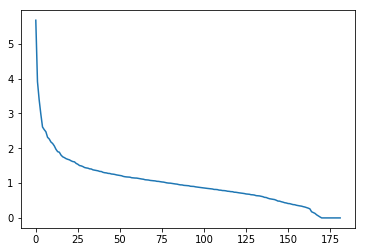

In [146]:
plt.plot(pca_ss.explained_variance_)
plt.show()

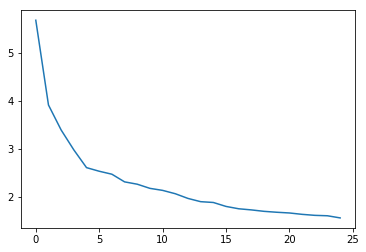

In [147]:
plt.plot(pca_ss.explained_variance_[:25])
plt.show()

In [148]:
## drastic change at point 4 - keep only 4?

pca_ss = PCA(n_components = 4)
pca_ss.fit(x_train_ss)
x_train_ss_pca = pca_ss.transform(x_train_ss)
x_validation_ss_pca = pca_ss.transform(x_validation_ss)
x_test_ss_pca = pca_ss.transform(x_test_ss)

#### MinMaxScaler data

In [149]:
pca_mm = PCA()
pca_mm.fit(x_train_mm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [150]:
pca_mm.explained_variance_[:10]

array([0.73098788, 0.62639968, 0.52291621, 0.45842664, 0.43957439,
       0.40018862, 0.35447514, 0.33166974, 0.32464653, 0.32113257])

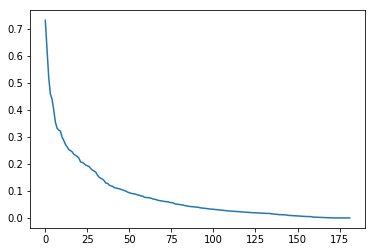

In [151]:
plt.plot(pca_mm.explained_variance_)
plt.show()

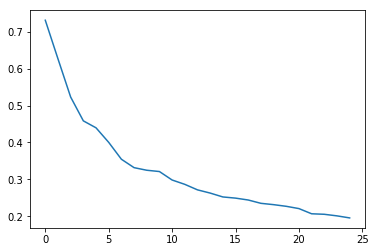

In [152]:
plt.plot(pca_mm.explained_variance_[:25])
plt.show()

In [153]:
## Changes after about 6? Or maybe 9?

pca_mm = PCA(n_components=6)
pca_mm.fit(x_train_mm)
x_train_mm_pca = pca_mm.transform(x_train_mm)
x_validation_mm_pca = pca_mm.transform(x_validation_mm)
x_test_mm_pca = pca_mm.transform(x_test_mm)

## Cross validation to find best hyperparameters

### KNN

In [154]:
knn = KNeighborsClassifier()
knn_param_grid = {'weights': ['uniform', 'distance'],
                  'n_neighbors': np.arange(1, 51)}

In [155]:
start = time.process_time()

datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
knn_results_all = pd.DataFrame()
knn_results_summary = pd.DataFrame()
knn_dataset = []
knn_dataset_smy = []
knn_scoring = []
knn_scoring_smy = []
knn_n = []
knn_w = []
knn_score = []
knn_std = []
knn_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        knn_model = GridSearchCV(estimator=knn,
                                 param_grid=knn_param_grid,
                                 scoring=scoring_type,
                                 cv=5,
                                 verbose=10,
                                 n_jobs=2)
        knn_model.fit(datasets[dataset], y_train)
        knn_dataset_smy.append(dataset)
        knn_scoring_smy.append(scoring_type)
        knn_best_params.append(knn_model.best_params_)
        for i in np.arange(0, len(knn_model.cv_results_['params'])):
            knn_dataset.append(dataset)
            knn_scoring.append(scoring_type)
            knn_n.append(knn_model.cv_results_['params'][i]['n_neighbors'])
            knn_w.append(knn_model.cv_results_['params'][i]['weights'])
            knn_score.append(knn_model.cv_results_['mean_test_score'][i])
            knn_std.append(knn_model.cv_results_['std_test_score'][i])

knn_results_summary['dataset'] = knn_dataset_smy
knn_results_summary['scoring'] = knn_scoring_smy
knn_results_summary['best_params'] = knn_best_params
                           
knn_results_all['dataset'] = knn_dataset
knn_results_all['scoring'] = knn_scoring
knn_results_all['neighbors'] = knn_n
knn_results_all['weights'] = knn_w
knn_results_all['score'] = knn_score
knn_results_all['std'] = knn_std

print(time.process_time() - start)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    5.7s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    8.2s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    9.6s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   11.4s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   12.8s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   16.5s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   18.5s
[Parallel(

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done  52 tasks      | elapsed:    5.2s
[Parallel(n_jobs=2)]: Done  70 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 110 tasks      | elapsed:   11.5s
[Parallel(n_jobs=2)]: Done 132 tasks      | elapsed:   14.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   17.0s
[Parallel(n_jobs=2)]: Done 184 tasks      | elapsed:   20.1s
[Parallel(n_jobs=2)]: Done 214 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done 244 tasks      | elapsed:   27.3s
[Parallel(n_jobs=2)]: Done 278 tasks      | elapsed:   31.4s
[Parallel(n_jobs=2)]: Done 312 tasks      | elapsed:   35.7s
[Parallel(n_jobs=2)]: Done 350 tasks      | elapsed:   40.5s
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   11.9s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   16.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   20.4s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   25.9s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   30.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   36.8s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   42.2s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   49.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   12.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   16.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   25.9s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   30.7s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   37.1s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   42.6s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   49.9s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   56.4s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    8.7s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   12.4s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   17.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.8s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   29.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   34.2s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   41.4s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   47.6s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   55.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   12.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   18.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.4s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   29.5s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   34.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   42.5s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   49.5s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   57.7s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Do

11.513137999999998


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  4.5min finished


In [156]:
knn_results_summary

,dataset,scoring,best_params
0,normal,accuracy,"{'n_neighbors': 18, 'weights': 'distance'}"
1,normal,f1,"{'n_neighbors': 18, 'weights': 'distance'}"
2,standard_scaler,accuracy,"{'n_neighbors': 48, 'weights': 'uniform'}"
3,standard_scaler,f1,"{'n_neighbors': 4, 'weights': 'distance'}"
4,min_max_scaler,accuracy,"{'n_neighbors': 28, 'weights': 'uniform'}"
5,min_max_scaler,f1,"{'n_neighbors': 8, 'weights': 'distance'}"


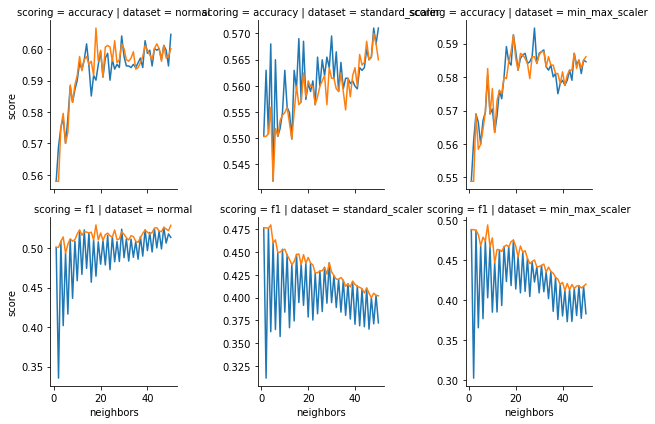

In [157]:
g = sns.FacetGrid(knn_results_all, 
                  row='scoring', 
                  col='dataset', 
                  hue='weights',
                  sharey=False)
g = g.map(sns.lineplot, 'neighbors', 'score')
plt.show()

In [280]:
knn_results_all.loc[knn_results_all['scoring'] == 'f1'].sort_values(['score'], ascending=False)

,dataset,scoring,neighbors,weights,score,std
135,normal,f1,18,distance,0.529581,0.019459
199,normal,f1,50,distance,0.529091,0.032519
193,normal,f1,47,distance,0.526549,0.034473
192,normal,f1,47,uniform,0.526491,0.031226
187,normal,f1,44,distance,0.526037,0.027707
185,normal,f1,43,distance,0.525597,0.031269
195,normal,f1,48,distance,0.524432,0.029196
184,normal,f1,43,uniform,0.524212,0.033869
156,normal,f1,29,uniform,0.524174,0.039301
121,normal,f1,11,distance,0.523327,0.034999


### Gaussian Naive Bayes

In [158]:
gnb = GaussianNB()
gnb_param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07]}

In [159]:
start = time.process_time()

datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
gnb_results_all = pd.DataFrame()
gnb_results_summary = pd.DataFrame()
gnb_dataset = []
gnb_dataset_smy = []
gnb_scoring = []
gnb_scoring_smy = []
gnb_v = []
gnb_score = []
gnb_std = []
gnb_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        gnb_model = GridSearchCV(estimator=gnb,
                                 param_grid=gnb_param_grid,
                                 scoring=scoring_type,
                                 cv=5,
                                 verbose=10)
        gnb_model.fit(datasets[dataset], y_train)
        gnb_dataset_smy.append(dataset)
        gnb_scoring_smy.append(scoring_type)
        gnb_best_params.append(gnb_model.best_params_)
        for i in np.arange(0, len(gnb_model.cv_results_['params'])):
            gnb_dataset.append(dataset)
            gnb_scoring.append(scoring_type)
            gnb_v.append(gnb_model.cv_results_['params'][i]['var_smoothing'])
            gnb_score.append(gnb_model.cv_results_['mean_test_score'][i])
            gnb_std.append(gnb_model.cv_results_['std_test_score'][i])

gnb_results_summary['dataset'] = gnb_dataset_smy
gnb_results_summary['scoring'] = gnb_scoring_smy
gnb_results_summary['best_params'] = gnb_best_params
                           
gnb_results_all['dataset'] = gnb_dataset
gnb_results_all['scoring'] = gnb_scoring
gnb_results_all['var_smoothing'] = gnb_v
gnb_results_all['score'] = gnb_score  
gnb_results_all['std'] = gnb_std

print(time.process_time() - start)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.4849246231155779, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.5175879396984925, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.5012594458438288, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ... var_smoothing=1e-09, score=0.48614609571788414, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.5176767676767676, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ..... var_smoothing=1e-08, score=0.507537688442211, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .... var_smo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] .... var_smoothing=1e-07, score=0.5566750629722922, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] ... var_smoothing=1e-07, score=0.49370277078085645, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.5176767676767676, total=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ..... var_smoothing=1e-09, score=0.590818363273453, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.6081632653061224, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.604, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.5984251968503937, total=   0.0s
[CV] var_smoothin

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] .... var_smoothing=1e-07, score=0.5887640449438202, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.6045454545454545, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] ................... var_smoothing=1e-07, score=0.6, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.5582417582417583, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.5783664459161147, total=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ... var_smoothing=1e-09, score=0.44974874371859297, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................... var_smoothing=1e-09, score=0.5, total=   0.0s
[CV] var_smoothin

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

[CV] ... var_smoothing=1e-07, score=0.48743718592964824, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.4836272040302267, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] ... var_smoothing=1e-07, score=0.45843828715365237, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.4621212121212121, total=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.6039783001808318, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.6401446654611211, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.6283662477558348, total=   0.0s
[CV] var_smoothin

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elaps

[CV] .... var_smoothing=1e-07, score=0.6134301270417423, total=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.4648241206030151, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.4949748743718593, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ... var_smoothing=1e-09, score=0.48866498740554154, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ... var_smoothing=1e-09, score=0.45843828715365237, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .... var_smoothing=1e-09, score=0.4595959595959596, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .... var_smoothing=1e-08, score=0.4648241206030151, total=   0.0s
[CV] var_smoothin

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elaps

[CV] ..... var_smoothing=1e-09, score=0.610909090909091, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ..... var_smoothing=1e-08, score=0.592734225621415, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .... var_smoothing=1e-08, score=0.6361904761904762, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .... var_smoothing=1e-08, score=0.6191369606003753, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .... var_smoothing=1e-08, score=0.6011131725417439, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .... var_smoothing=1e-08, score=0.6136783733826248, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .... var_smoothing=1e-07, score=0.6007751937984497, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


In [160]:
gnb_results_summary

,dataset,scoring,best_params
0,normal,accuracy,{'var_smoothing': 1e-07}
1,normal,f1,{'var_smoothing': 1e-09}
2,standard_scaler,accuracy,{'var_smoothing': 1e-07}
3,standard_scaler,f1,{'var_smoothing': 1e-09}
4,min_max_scaler,accuracy,{'var_smoothing': 1e-07}
5,min_max_scaler,f1,{'var_smoothing': 1e-09}


In [161]:
gnb_results_all

,dataset,scoring,var_smoothing,score,std
0,normal,accuracy,1.000000e-09,0.501511,0.014361
1,normal,accuracy,1.000000e-08,0.517120,0.020007
2,normal,accuracy,1.000000e-07,0.534240,0.025584
3,normal,f1,1.000000e-09,0.604624,0.010352
4,normal,f1,1.000000e-08,0.599727,0.011152
5,normal,f1,1.000000e-07,0.585998,0.016592
6,standard_scaler,accuracy,1.000000e-09,0.466264,0.020668
7,standard_scaler,accuracy,1.000000e-08,0.469789,0.015176
8,standard_scaler,accuracy,1.000000e-07,0.471299,0.011867
9,standard_scaler,f1,1.000000e-09,0.617885,0.014603


### Random Forest

In [162]:
rfc = RandomForestClassifier(random_state=5322, class_weight='balanced')
rfc_param_grid = {'n_estimators': [10, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [4, 7, 10, None],
                  'max_features': [7, 15, 25, None]}

In [163]:
start = time.process_time()

datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
rfc_results_all = pd.DataFrame()
rfc_results_summary = pd.DataFrame()
rfc_dataset = []
rfc_dataset_smy = []
rfc_scoring = []
rfc_scoring_smy = []
rfc_n = []
rfc_c = []
rfc_md = []
rfc_mf = []
rfc_score = []
rfc_std = []
rfc_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        rfc_model = GridSearchCV(estimator=rfc,
                                 param_grid=rfc_param_grid,
                                 scoring=scoring_type,
                                 cv=5,
                                 verbose=10,
                                 n_jobs=2)
        rfc_model.fit(datasets[dataset], y_train)
        rfc_dataset_smy.append(dataset)
        rfc_scoring_smy.append(scoring_type)
        rfc_best_params.append(rfc_model.best_params_)
        for i in np.arange(0, len(rfc_model.cv_results_['params'])):
            rfc_dataset.append(dataset)
            rfc_scoring.append(scoring_type)
            rfc_n.append(rfc_model.cv_results_['params'][i]['n_estimators'])
            rfc_c.append(rfc_model.cv_results_['params'][i]['criterion'])
            rfc_md.append(rfc_model.cv_results_['params'][i]['max_depth'])
            rfc_mf.append(rfc_model.cv_results_['params'][i]['max_features'])
            rfc_score.append(rfc_model.cv_results_['mean_test_score'][i])
            rfc_std.append(rfc_model.cv_results_['std_test_score'][i])

rfc_results_summary['dataset'] = rfc_dataset_smy
rfc_results_summary['scoring'] = rfc_scoring_smy
rfc_results_summary['best_params'] = rfc_best_params
                           
rfc_results_all['dataset'] = rfc_dataset
rfc_results_all['scoring'] = rfc_scoring
rfc_results_all['n_estimators'] = rfc_n
rfc_results_all['criterion'] = rfc_c
rfc_results_all['max_depth'] = rfc_md
rfc_results_all['max_features'] = rfc_mf
rfc_results_all['score'] = rfc_score  
rfc_results_all['std'] = rfc_std

print(time.process_time() - start)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0625s.) Setting batch_size=6.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  64 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Batch computation too slow (2.1209s.) Setting batch_size=3.
[Parallel(n_jobs=2)]: Done 100 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Batch computation too slow (2.1311s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done 121 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done 132 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   16.8s
[Parallel(n_jobs=2)]: Done 152 tasks      | elapsed:   18.1s
[Parallel(n_jobs=2)]: Done 163 tasks      | elapsed:   19.6s
[Parallel(n_jobs=2)]: Done 176 tasks      | elapsed:   23.4s
[Paralle

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0452s.) Setting batch_size=8.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  44 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done  84 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Batch computation too slow (2.7642s.) Setting batch_size=4.
[Parallel(n_jobs=2)]: Batch computation too slow (3.7744s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:   12.5s
[Parallel(n_jobs=2)]: Done 144 tasks      | elapsed:   13.5s
[Parallel(n_jobs=2)]: Done 162 tasks      | elapsed:   15.6s
[Parallel(n_jobs=2)]: Batch computation too slow (2.3860s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done 180 tasks      | elapsed:   21.2s
[Parallel(n_jobs=2)]: Done 193 tasks      | elapsed:   23.3s
[Parallel(n_jobs=2)]: Done 204 tasks      | elap

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0388s.) Setting batch_size=10.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  54 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Batch computation too slow (2.0302s.) Setting batch_size=5.
[Parallel(n_jobs=2)]: Done  99 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Batch computation too slow (2.1603s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Batch computation too slow (3.1494s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done 122 tasks      | elapsed:   11.1s
[Parallel(n_jobs=2)]: Done 129 tasks      | elapsed:   12.4s
[Parallel(n_jobs=2)]: Done 142 tasks      | elapsed:   12.8s
[Parallel(n_jobs=2)]: Done 151 tasks      | elapsed:   13.9s
[Parallel(n_jobs=2)]: Done 162 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 173 tasks      | ela

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0487s.) Setting batch_size=8.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  44 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done  84 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Batch computation too slow (2.7653s.) Setting batch_size=4.
[Parallel(n_jobs=2)]: Batch computation too slow (4.2382s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:   13.3s
[Parallel(n_jobs=2)]: Batch computation too slow (2.0155s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   14.4s
[Parallel(n_jobs=2)]: Done 150 tasks      | elapsed:   15.5s
[Parallel(n_jobs=2)]: Done 159 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done 170 tasks      | elapsed:   19.1s
[Parallel(n_jobs=2)]: Done 181 tasks      | elap

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0466s.) Setting batch_size=8.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  44 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done  84 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Batch computation too slow (2.5311s.) Setting batch_size=4.
[Parallel(n_jobs=2)]: Batch computation too slow (3.9383s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:   11.9s
[Parallel(n_jobs=2)]: Done 144 tasks      | elapsed:   13.8s
[Parallel(n_jobs=2)]: Done 162 tasks      | elapsed:   15.6s
[Parallel(n_jobs=2)]: Batch computation too slow (2.0243s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done 180 tasks      | elapsed:   20.3s
[Parallel(n_jobs=2)]: Done 193 tasks      | elapsed:   22.1s
[Parallel(n_jobs=2)]: Done 204 tasks      | elap

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0400s.) Setting batch_size=10.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  54 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Batch computation too slow (2.1784s.) Setting batch_size=5.
[Parallel(n_jobs=2)]: Done  99 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Batch computation too slow (2.5466s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Batch computation too slow (5.0152s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done 122 tasks      | elapsed:   13.7s
[Parallel(n_jobs=2)]: Done 129 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done 142 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done 151 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done 162 tasks      | elapsed:   17.0s
[Parallel(n_jobs=2)]: Done 173 tasks      | ela

12.381365999999986


In [164]:
rfc_results_summary

,dataset,scoring,best_params
0,normal,accuracy,"{'criterion': 'gini', 'max_depth': None, 'max_..."
1,normal,f1,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
2,standard_scaler,accuracy,"{'criterion': 'gini', 'max_depth': None, 'max_..."
3,standard_scaler,f1,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
4,min_max_scaler,accuracy,"{'criterion': 'gini', 'max_depth': None, 'max_..."
5,min_max_scaler,f1,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."


In [281]:
rfc_results_all.loc[ (rfc_results_all['scoring'] == 'f1'), ].sort_values(['score'], ascending=False)

,dataset,scoring,n_estimators,criterion,max_depth,max_features,score,std
347,standard_scaler,f1,100,entropy,4.0,NaN,0.640785,0.017140
539,min_max_scaler,f1,100,entropy,4.0,NaN,0.640785,0.017140
155,normal,f1,100,entropy,4.0,NaN,0.640785,0.017140
107,normal,f1,100,gini,4.0,NaN,0.637329,0.020965
299,standard_scaler,f1,100,gini,4.0,NaN,0.637329,0.020965
491,min_max_scaler,f1,100,gini,4.0,NaN,0.637329,0.020965
153,normal,f1,10,entropy,4.0,NaN,0.635923,0.018810
537,min_max_scaler,f1,10,entropy,4.0,NaN,0.635923,0.018810
345,standard_scaler,f1,10,entropy,4.0,NaN,0.635923,0.018810
106,normal,f1,50,gini,4.0,NaN,0.634970,0.016940


#### Randomized version

In [166]:
rfc_2 = RandomForestClassifier(random_state=5322, class_weight='balanced')
rfc_param_2 = {'n_estimators': sp_randint(10, 200),
                  'criterion': ['gini', 'entropy'],
                  'max_depth': sp_randint(3, 50),
                  'max_features': sp_randint(5, 25)}

In [167]:
start = time.process_time()

n_iter_search = 100
datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
rfc2_results_all = pd.DataFrame()
rfc2_results_summary = pd.DataFrame()
rfc_dataset = []
rfc_dataset_smy = []
rfc_scoring = []
rfc_scoring_smy = []
rfc_n = []
rfc_c = []
rfc_md = []
rfc_mf = []
rfc_score = []
rfc_std = []
rfc_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        rfc_model = RandomizedSearchCV(estimator=rfc_2,
                                       param_distributions=rfc_param_2,
                                       n_iter=n_iter_search,
                                       scoring=scoring_type,
                                       cv=5,
                                       random_state=5322, #5322
                                       verbose=10,
                                       n_jobs=2)
        rfc_model.fit(datasets[dataset], y_train)
        rfc_dataset_smy.append(dataset)
        rfc_scoring_smy.append(scoring_type)
        rfc_best_params.append(rfc_model.best_params_)
        for i in np.arange(0, len(rfc_model.cv_results_['params'])):
            rfc_dataset.append(dataset)
            rfc_scoring.append(scoring_type)
            rfc_n.append(rfc_model.cv_results_['params'][i]['n_estimators'])
            rfc_c.append(rfc_model.cv_results_['params'][i]['criterion'])
            rfc_md.append(rfc_model.cv_results_['params'][i]['max_depth'])
            rfc_mf.append(rfc_model.cv_results_['params'][i]['max_features'])
            rfc_score.append(rfc_model.cv_results_['mean_test_score'][i])
            rfc_std.append(rfc_model.cv_results_['std_test_score'][i])

rfc2_results_summary['dataset'] = rfc_dataset_smy
rfc2_results_summary['scoring'] = rfc_scoring_smy
rfc2_results_summary['best_params'] = rfc_best_params
                           
rfc2_results_all['dataset'] = rfc_dataset
rfc2_results_all['scoring'] = rfc_scoring
rfc2_results_all['n_estimators'] = rfc_n
rfc2_results_all['criterion'] = rfc_c
rfc2_results_all['max_depth'] = rfc_md
rfc2_results_all['max_features'] = rfc_mf
rfc2_results_all['score'] = rfc_score  
rfc2_results_all['std'] = rfc_std

print(time.process_time() - start)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   12.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   13.5s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   16.4s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   22.7s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   26.8s
[Parallel(

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   11.7s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   13.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   17.3s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   19.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   27.2s
[Parallel(

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.1s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   10.8s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   12.9s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   14.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   18.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   20.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   25.6s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   30.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   33.3s
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    7.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    8.2s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   12.7s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   15.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   17.5s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   21.7s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   24.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   30.7s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   35.8s
[Parallel(

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    5.1s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   10.6s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   12.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   14.6s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   20.7s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   24.2s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   26.8s
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   11.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   13.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   16.2s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   18.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   22.6s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   26.5s
[Parallel(

17.456129000000004


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  1.8min finished


In [168]:
rfc2_results_summary

,dataset,scoring,best_params
0,normal,accuracy,"{'criterion': 'entropy', 'max_depth': 25, 'max..."
1,normal,f1,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
2,standard_scaler,accuracy,"{'criterion': 'gini', 'max_depth': 12, 'max_fe..."
3,standard_scaler,f1,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
4,min_max_scaler,accuracy,"{'criterion': 'gini', 'max_depth': 12, 'max_fe..."
5,min_max_scaler,f1,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."


In [169]:
rfc2_results_all.loc[(rfc2_results_all['scoring'] == 'f1'), ].sort_values(['score'], ascending=False)

,dataset,scoring,n_estimators,criterion,max_depth,max_features,score,std
599,min_max_scaler,f1,60,gini,6,19,0.598949,0.016423
199,normal,f1,60,gini,6,19,0.598949,0.016423
399,standard_scaler,f1,60,gini,6,19,0.598949,0.016423
514,min_max_scaler,f1,50,entropy,6,22,0.598364,0.029108
114,normal,f1,50,entropy,6,22,0.598364,0.029108
314,standard_scaler,f1,50,entropy,6,22,0.598364,0.029108
152,normal,f1,164,gini,6,22,0.596927,0.022138
552,min_max_scaler,f1,164,gini,6,22,0.596536,0.022277
352,standard_scaler,f1,164,gini,6,22,0.596114,0.022648
359,standard_scaler,f1,103,entropy,3,13,0.593258,0.040525


### Gradient Boosting

In [170]:
gbc = GradientBoostingClassifier(random_state=5322)
gbc_param_grid = {'loss': ['deviance', 'exponential'],
                  'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                  'max_depth': [4, 7, 10],
                  'max_features': [10, 50, None]}

In [171]:
start = time.process_time()

datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
gbc_results_all = pd.DataFrame()
gbc_results_summary = pd.DataFrame()
gbc_dataset = []
gbc_dataset_smy = []
gbc_scoring = []
gbc_scoring_smy = []
gbc_loss = []
gbc_lr = []
gbc_md = []
gbc_mf = []
gbc_score = []
gbc_std = []
gbc_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        gbc_model = GridSearchCV(estimator=gbc,
                                 param_grid=gbc_param_grid,
                                 scoring=scoring_type,
                                 cv=5,
                                 verbose=10,
                                 n_jobs=2)
        gbc_model.fit(datasets[dataset], y_train)
        gbc_dataset_smy.append(dataset)
        gbc_scoring_smy.append(scoring_type)
        gbc_best_params.append(gbc_model.best_params_)
        for i in np.arange(0, len(gbc_model.cv_results_['params'])):
            gbc_dataset.append(dataset)
            gbc_scoring.append(scoring_type)
            gbc_loss.append(gbc_model.cv_results_['params'][i]['loss'])
            gbc_lr.append(gbc_model.cv_results_['params'][i]['learning_rate'])
            gbc_md.append(gbc_model.cv_results_['params'][i]['max_depth'])
            gbc_mf.append(gbc_model.cv_results_['params'][i]['max_features'])
            gbc_score.append(gbc_model.cv_results_['mean_test_score'][i])
            gbc_std.append(gbc_model.cv_results_['std_test_score'][i])

gbc_results_summary['dataset'] = gbc_dataset_smy
gbc_results_summary['scoring'] = gbc_scoring_smy
gbc_results_summary['best_params'] = gbc_best_params
                           
gbc_results_all['dataset'] = gbc_dataset
gbc_results_all['scoring'] = gbc_scoring
gbc_results_all['loss'] = gbc_loss
gbc_results_all['learning_rate'] = gbc_lr
gbc_results_all['max_depth'] = gbc_md
gbc_results_all['max_features'] = gbc_mf
gbc_results_all['score'] = gbc_score  
gbc_results_all['std'] = gbc_std

print(time.process_time() - start)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   22.7s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   36.8s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  3.5min
[Parallel(

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1817s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Batch computation too slow (2.5992s.) Setting batch_size=1.
[Parallel(n_jobs=2)]: Done  23 tasks      | elapsed:   11.4s
[Parallel(n_jobs=2)]: Done  30 tasks      | elapsed:   22.5s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   30.7s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   51.7s
[Parallel(n_jobs=2)]: Done  55 tasks      | elapsed:   56.5s
[Parallel(n_jobs=2)]: Done  66 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  90 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 103 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 11

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    9.4s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   17.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   51.7s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   58.3s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  2.5min
[Parallel(

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   24.7s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   45.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   50.1s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   57.4s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  2.4min
[Parallel(

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   15.6s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   24.8s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   43.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   48.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   55.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  2.3min
[Parallel(

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   25.7s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   44.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   48.1s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   54.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  2.3min
[Parallel(

18.009040999999996


In [172]:
gbc_results_summary

,dataset,scoring,best_params
0,normal,accuracy,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma..."
1,normal,f1,"{'learning_rate': 0.1, 'loss': 'exponential', ..."
2,standard_scaler,accuracy,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma..."
3,standard_scaler,f1,"{'learning_rate': 0.1, 'loss': 'exponential', ..."
4,min_max_scaler,accuracy,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma..."
5,min_max_scaler,f1,"{'learning_rate': 0.1, 'loss': 'exponential', ..."


In [173]:
gbc_results_all.loc[(gbc_results_all['scoring'] == 'f1'), ].sort_values(['score'], ascending=False)

,dataset,scoring,loss,learning_rate,max_depth,max_features,score,std
137,normal,f1,exponential,0.100,4,NaN,0.582619,0.012581
497,min_max_scaler,f1,exponential,0.100,4,NaN,0.582619,0.012581
317,standard_scaler,f1,exponential,0.100,4,NaN,0.582619,0.012581
127,normal,f1,deviance,0.100,4,50.0,0.580357,0.019438
307,standard_scaler,f1,deviance,0.100,4,50.0,0.580357,0.019438
487,min_max_scaler,f1,deviance,0.100,4,50.0,0.580357,0.019438
333,standard_scaler,f1,exponential,0.200,4,10.0,0.575090,0.014947
153,normal,f1,exponential,0.200,4,10.0,0.575090,0.014947
331,standard_scaler,f1,deviance,0.200,10,50.0,0.574775,0.021666
513,min_max_scaler,f1,exponential,0.200,4,10.0,0.574214,0.015607


#### Randomized version

In [174]:
gbc2 = GradientBoostingClassifier(random_state=5322)
gbc2_param_grid = {'loss': ['deviance', 'exponential'],
                  'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                  'max_depth': sp_randint(2, 20),
                  'max_features': sp_randint(5, 100)}

In [175]:
start = time.process_time()

n_iter_seach = 100
datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
gbc2_results_all = pd.DataFrame()
gbc2_results_summary = pd.DataFrame()
gbc_dataset = []
gbc_dataset_smy = []
gbc_scoring = []
gbc_scoring_smy = []
gbc_loss = []
gbc_lr = []
gbc_md = []
gbc_mf = []
gbc_score = []
gbc_std = []
gbc_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        gbc_model = RandomizedSearchCV(estimator=gbc2,
                                       param_distributions=gbc2_param_grid,
                                       scoring=scoring_type,
                                       cv=5,
                                       random_state=5322,
                                       n_iter = n_iter_search,
                                       verbose=10,
                                       n_jobs=2)
        gbc_model.fit(datasets[dataset], y_train)
        gbc_dataset_smy.append(dataset)
        gbc_scoring_smy.append(scoring_type)
        gbc_best_params.append(gbc_model.best_params_)
        for i in np.arange(0, len(gbc_model.cv_results_['params'])):
            gbc_dataset.append(dataset)
            gbc_scoring.append(scoring_type)
            gbc_loss.append(gbc_model.cv_results_['params'][i]['loss'])
            gbc_lr.append(gbc_model.cv_results_['params'][i]['learning_rate'])
            gbc_md.append(gbc_model.cv_results_['params'][i]['max_depth'])
            gbc_mf.append(gbc_model.cv_results_['params'][i]['max_features'])
            gbc_score.append(gbc_model.cv_results_['mean_test_score'][i])
            gbc_std.append(gbc_model.cv_results_['std_test_score'][i])

gbc2_results_summary['dataset'] = gbc_dataset_smy
gbc2_results_summary['scoring'] = gbc_scoring_smy
gbc2_results_summary['best_params'] = gbc_best_params
                           
gbc2_results_all['dataset'] = gbc_dataset
gbc2_results_all['scoring'] = gbc_scoring
gbc2_results_all['loss'] = gbc_loss
gbc2_results_all['learning_rate'] = gbc_lr
gbc2_results_all['max_depth'] = gbc_md
gbc2_results_all['max_features'] = gbc_mf
gbc2_results_all['score'] = gbc_score  
gbc2_results_all['std'] = gbc_std

print(time.process_time() - start)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   16.2s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   32.9s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   35.7s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   38.1s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   52.1s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  4.0min
[Parallel(

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   13.4s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   32.7s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   35.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   38.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   49.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   57.1s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   12.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   26.4s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   28.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   30.8s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   40.7s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   48.1s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   14.5s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   28.9s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   31.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   34.1s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   44.5s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   52.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   13.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   27.6s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   30.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   31.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   41.8s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  6.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  7.1min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  7.6min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  8.4min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  9.0min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  9.4min
[Parallel(n_jobs=2)]: Do

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   13.2s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   28.8s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   31.4s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   33.6s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   44.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   52.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Do

14.601072000000016


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed: 18.1min finished


In [176]:
gbc2_results_summary

,dataset,scoring,best_params
0,normal,accuracy,"{'learning_rate': 0.3, 'loss': 'exponential', ..."
1,normal,f1,"{'learning_rate': 0.3, 'loss': 'exponential', ..."
2,standard_scaler,accuracy,"{'learning_rate': 0.3, 'loss': 'exponential', ..."
3,standard_scaler,f1,"{'learning_rate': 0.3, 'loss': 'exponential', ..."
4,min_max_scaler,accuracy,"{'learning_rate': 0.3, 'loss': 'exponential', ..."
5,min_max_scaler,f1,"{'learning_rate': 0.3, 'loss': 'exponential', ..."


In [177]:
gbc2_results_all.loc[gbc2_results_all['scoring'] == 'f1', ].sort_values(['score'], ascending=False)

,dataset,scoring,loss,learning_rate,max_depth,max_features,score,std
325,standard_scaler,f1,exponential,0.300,2,16,0.581530,0.024808
525,min_max_scaler,f1,exponential,0.300,2,16,0.581530,0.024808
125,normal,f1,exponential,0.300,2,16,0.581530,0.024808
348,standard_scaler,f1,deviance,0.200,2,75,0.580820,0.016617
548,min_max_scaler,f1,deviance,0.200,2,75,0.580820,0.016617
148,normal,f1,deviance,0.200,2,75,0.580820,0.016617
382,standard_scaler,f1,deviance,0.100,3,74,0.576511,0.020434
182,normal,f1,deviance,0.100,3,74,0.576511,0.020434
582,min_max_scaler,f1,deviance,0.100,3,74,0.576511,0.020434
150,normal,f1,exponential,0.100,8,93,0.571564,0.016987


### SVM

In [178]:
svm = SVC(random_state=5322)
svm_param_grid = {'C': [0.01, 0.05, 0.1, 1, 10],
                  'gamma': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}

In [179]:
start = time.time()

datasets = {'normal': x_train, 
            'standard_scaler': x_train_ss, 
            'min_max_scaler': x_train_mm}
scoring_types = ['accuracy', 'f1']
svm_results_all = pd.DataFrame()
svm_results_summary = pd.DataFrame()
svm_dataset = []
svm_dataset_smy = []
svm_scoring = []
svm_scoring_smy = []
svm_c = []
svm_g = []
svm_score = []
svm_std = []
svm_best_params = []

for dataset in datasets:
    for scoring_type in scoring_types:
        svm_model = GridSearchCV(estimator=svm,
                                 param_grid=svm_param_grid,
                                 scoring=scoring_type,
                                 cv=5,
                                 verbose=10,
                                 n_jobs=2)
        svm_model.fit(datasets[dataset], y_train)
        svm_dataset_smy.append(dataset)
        svm_scoring_smy.append(scoring_type)
        svm_best_params.append(svm_model.best_params_)
        for i in np.arange(0, len(svm_model.cv_results_['params'])):
            svm_dataset.append(dataset)
            svm_scoring.append(scoring_type)
            svm_c.append(svm_model.cv_results_['params'][i]['C'])
            svm_g.append(svm_model.cv_results_['params'][i]['gamma'])
            svm_score.append(svm_model.cv_results_['mean_test_score'][i])
            svm_std.append(svm_model.cv_results_['std_test_score'][i])

svm_results_summary['dataset'] = svm_dataset_smy
svm_results_summary['scoring'] = svm_scoring_smy
svm_results_summary['best_params'] = svm_best_params
                           
svm_results_all['dataset'] = svm_dataset
svm_results_all['scoring'] = svm_scoring
svm_results_all['C'] = svm_c
svm_results_all['gamma'] = svm_g
svm_results_all['score'] = svm_score  
svm_results_all['std'] = svm_std

print(time.time() - start)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    7.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.8s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.6s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.1s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   40.6s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   47.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   56.8s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.6min
[Parallel(

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    7.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    9.6s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.8s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.1s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   40.3s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   47.2s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   56.7s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.6min
[Parallel(

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    9.5s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.7s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.6s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   41.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   48.1s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   57.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.7min
[Parallel(

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    7.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.6s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   20.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   27.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.7s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   41.5s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   48.7s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   58.3s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.7min
[Parallel(

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    9.5s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   31.6s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   40.2s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   46.9s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   56.4s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  1.6min
[Parallel(

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    9.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   19.4s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.1s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   31.4s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   39.3s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   45.9s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   55.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  2.1min
[Parallel(

664.9622159004211


In [180]:
svm_results_summary

,dataset,scoring,best_params
0,normal,accuracy,"{'C': 10, 'gamma': 0.0005}"
1,normal,f1,"{'C': 10, 'gamma': 0.0005}"
2,standard_scaler,accuracy,"{'C': 1, 'gamma': 0.0005}"
3,standard_scaler,f1,"{'C': 10, 'gamma': 0.001}"
4,min_max_scaler,accuracy,"{'C': 10, 'gamma': 0.0005}"
5,min_max_scaler,f1,"{'C': 10, 'gamma': 0.1}"


In [282]:
svm_results_all.loc[(svm_results_all['scoring'] == 'f1') , ].sort_values(['score'], ascending=False)

,dataset,scoring,C,gamma,score,std
54,normal,f1,10.00,0.0005,0.583696,0.019341
55,normal,f1,10.00,0.0010,0.572977,0.020221
56,normal,f1,10.00,0.0050,0.569272,0.029112
49,normal,f1,1.00,0.0010,0.559863,0.017863
57,normal,f1,10.00,0.0100,0.555874,0.026690
51,normal,f1,1.00,0.0100,0.552063,0.016985
50,normal,f1,1.00,0.0050,0.538797,0.026132
48,normal,f1,1.00,0.0005,0.537514,0.046079
179,min_max_scaler,f1,10.00,0.1000,0.528234,0.024275
178,min_max_scaler,f1,10.00,0.0500,0.523691,0.020932


### Validation step - choose best performing model

#### Data as is

In [222]:
knn_best = KNeighborsClassifier(n_neighbors = 18,
                                weights='distance')
gnb_best = GaussianNB()
rfc_best = RandomForestClassifier(random_state=5322,
                                  class_weight='balanced',
                                  n_estimators=100,
                                  max_depth=4,
                                  max_features=None,
                                  criterion='entropy')
gbc_best = GradientBoostingClassifier(random_state=5322,
                                      loss='exponential',
                                      learning_rate=0.1,
                                      max_depth=4,
                                      max_features=None)
svm_best = SVC(random_state= 5322, C=10, gamma=0.0005, probability=True)

models = {'knn_best':knn_best,
          'gnb_best':gnb_best, 
          'rfc_best':rfc_best, 
          'gbc_best':gbc_best,
          'svm_best':svm_best}

In [223]:
start = time.process_time()

validation_results = pd.DataFrame()
validation_results['actual'] = y_validation
validation_results['guessing'] = np.array(0) *(len(y_validation))

for model in models:
    models[model].fit(x_train, y_train)
    y_pred = models[model].predict(x_validation)
    validation_results[model] = y_pred
    
time.process_time() - start

6.708620999999994

In [224]:
validation_results.head()

,actual,guessing,knn_best,gnb_best,rfc_best,gbc_best,svm_best
1178,0,0,0,0,0,0,0
2064,1,0,1,1,1,1,1
2521,0,0,0,1,0,0,0
3208,0,0,0,1,1,0,1
1411,1,0,0,1,1,1,1


In [225]:
for model in models:
    table = pd.crosstab(validation_results[model], validation_results['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')
table = pd.crosstab(validation_results['guessing'], validation_results['actual'])
tp = 0
tn = table.iloc[0, 0]
fp = 0
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = 0
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')

actual      0    1
knn_best          
0         249  142
1         116  155
True positives: 155
True negatives: 249
False positives: 116
False negatives: 142
Accuracy: 0.6102719033232629
Precision: 0.5719557195571956
Recall: 0.5218855218855218
F1: 0.5457746478873239



actual      0    1
gnb_best          
0          77   52
1         288  245
True positives: 245
True negatives: 77
False positives: 288
False negatives: 52
Accuracy: 0.486404833836858
Precision: 0.4596622889305816
Recall: 0.8249158249158249
F1: 0.5903614457831325



actual      0    1
rfc_best          
0         187   69
1         178  228
True positives: 228
True negatives: 187
False positives: 178
False negatives: 69
Accuracy: 0.6268882175226587
Precision: 0.5615763546798029
Recall: 0.7676767676767676
F1: 0.6486486486486486



actual      0    1
gbc_best          
0         268  140
1          97  157
True positives: 157
True negatives: 268
False positives: 97
False negatives: 140
Accuracy: 0.6419939577039275
Precisio

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


#### Average rfc and gbc

In [226]:
start = time.process_time()

models_av = {'rfc_best':rfc_best, 
          'gbc_best':gbc_best}

validation_results_av = pd.DataFrame()
validation_results_av['actual'] = y_validation

for model in models_av:
    models_av[model].fit(x_train, y_train)
    y_pred = models_av[model].predict_proba(x_validation)
    prob_1 = []
    for prob in np.arange(0, len(y_pred)):
        prob_1.append(y_pred[prob][1])
    validation_results_av[model] = prob_1
validation_results_av['average_prob'] = (validation_results_av['rfc_best'] + validation_results_av['gbc_best']) / 2
validation_results_av['average_y'] = np.where(validation_results_av['average_prob'] > 0.5, 1, 0)
    
time.process_time() - start

2.2125480000000266

In [227]:
validation_results_av.head()

,actual,rfc_best,gbc_best,average_prob,average_y
1178,0,0.157453,0.064854,0.111154,0
2064,1,0.594422,0.692052,0.643237,1
2521,0,0.265339,0.145837,0.205588,0
3208,0,0.605942,0.373647,0.489795,0
1411,1,0.584058,0.748045,0.666051,1


In [228]:
table = pd.crosstab(validation_results_av['average_y'], validation_results['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')

actual       0    1
average_y          
0          254  120
1          111  177
True positives: 177
True negatives: 254
False positives: 111
False negatives: 120
Accuracy: 0.6510574018126888
Precision: 0.6145833333333334
Recall: 0.5959595959595959
F1: 0.6051282051282051





#### Average rfc and svm

In [229]:
start = time.process_time()

models_av2 = {'rfc_best':rfc_best, 
          'svm_best':svm_best}

validation_results_av2 = pd.DataFrame()
validation_results_av2['actual'] = y_validation

for model in models_av2:
    models_av2[model].fit(x_train, y_train)
    y_pred = models_av2[model].predict_proba(x_validation)
    prob_1 = []
    for prob in np.arange(0, len(y_pred)):
        prob_1.append(y_pred[prob][1])
    validation_results_av2[model] = prob_1
validation_results_av2['average_prob'] = (validation_results_av2['rfc_best'] + validation_results_av2['svm_best']) / 2
validation_results_av2['average_y'] = np.where(validation_results_av2['average_prob'] > 0.5, 1, 0)
    
time.process_time() - start

6.039475999999979

In [230]:
table = pd.crosstab(validation_results_av2['average_y'], validation_results_av2['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')

actual       0    1
average_y          
0          248  115
1          117  182
True positives: 182
True negatives: 248
False positives: 117
False negatives: 115
Accuracy: 0.649546827794562
Precision: 0.6086956521739131
Recall: 0.6127946127946128
F1: 0.6107382550335569





In [250]:
precision_rfc_svm, recall_rfc_svm, thresholds_rfc_svm = precision_recall_curve(y_validation, validation_results_av2['average_prob'])

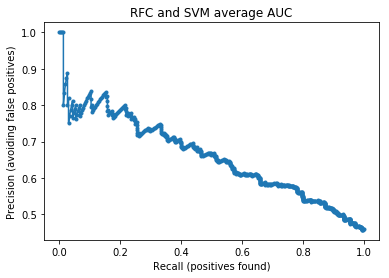

In [258]:
plt.plot(recall_rfc_svm, precision_rfc_svm, marker='.')
plt.xlabel('Recall (positives found)')
plt.ylabel('Precision (avoiding false positives)')
plt.title('RFC and SVM average AUC')
plt.show()

In [259]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_validation, validation_results_av2['svm_best'])

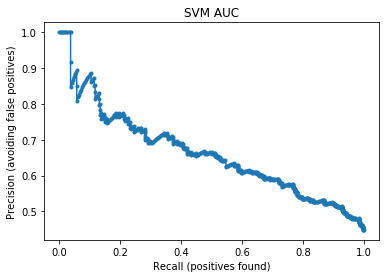

In [260]:
plt.plot(recall_svm, precision_svm, marker='.')
plt.xlabel('Recall (positives found)')
plt.ylabel('Precision (avoiding false positives)')
plt.title('SVM AUC')
plt.show()

#### Standard Scaler data

In [321]:
knn_best_ss = KNeighborsClassifier(n_neighbors = 4,
                                   weights='distance')
gnb_best_ss = GaussianNB()
rfc_best_ss = RandomForestClassifier(random_state=5322,
                                  class_weight='balanced',
                                  n_estimators=100,
                                  max_depth=4,
                                  max_features=None,
                                  criterion='entropy')
gbc_best_ss = GradientBoostingClassifier(random_state=5322,
                                      loss='exponential',
                                      learning_rate=0.1,
                                      max_depth=4,
                                      max_features=None)
svm_best_ss = SVC(random_state= 5322, C=10, gamma=0.001, probability=True)

models_ss = {'knn_best_ss':knn_best_ss,
          'gnb_best_ss':gnb_best_ss, 
          'rfc_best_ss':rfc_best_ss, 
          'gbc_best_ss':gbc_best_ss,
            'svm_best_ss':svm_best_ss}

In [322]:
start = time.process_time()

validation_results_ss = pd.DataFrame()
validation_results_ss['actual'] = y_validation

for model in models_ss:
    models_ss[model].fit(x_train_ss, y_train)
    y_pred = models_ss[model].predict(x_validation_ss)
    validation_results_ss[model] = y_pred
    
time.process_time() - start

7.82075199999997

In [323]:
for model in models_ss:
    table = pd.crosstab(validation_results_ss[model], validation_results_ss['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')

actual         0    1
knn_best_ss          
0            230  179
1            135  118
True positives: 118
True negatives: 230
False positives: 135
False negatives: 179
Accuracy: 0.525679758308157
Precision: 0.466403162055336
Recall: 0.39730639730639733
F1: 0.42909090909090913



actual         0    1
gnb_best_ss          
0             24   10
1            341  287
True positives: 287
True negatives: 24
False positives: 341
False negatives: 10
Accuracy: 0.4697885196374622
Precision: 0.4570063694267516
Recall: 0.9663299663299664
F1: 0.6205405405405406



actual         0    1
rfc_best_ss          
0            187   69
1            178  228
True positives: 228
True negatives: 187
False positives: 178
False negatives: 69
Accuracy: 0.6268882175226587
Precision: 0.5615763546798029
Recall: 0.7676767676767676
F1: 0.6486486486486486



actual         0    1
gbc_best_ss          
0            268  140
1             97  157
True positives: 157
True negatives: 268
False positives: 97
False neg

#### Average rfc and gbc

In [239]:
start = time.process_time()

models_ss_av = {'rfc_best_ss':rfc_best_ss, 
                'gbc_best_ss':gbc_best_ss}

validation_results_ss_av = pd.DataFrame()
validation_results_ss_av['actual'] = y_validation

for model in models_ss_av:
    models_ss_av[model].fit(x_train_ss, y_train)
    y_pred = models_ss_av[model].predict_proba(x_validation_ss)
    prob_1 = []
    for prob in np.arange(0, len(y_pred)):
        prob_1.append(y_pred[prob][1])
    validation_results_ss_av[model] = prob_1
validation_results_ss_av['average_prob'] = (validation_results_ss_av['rfc_best_ss'] + validation_results_ss_av['gbc_best_ss']) / 2
validation_results_ss_av['average_y'] = np.where(validation_results_ss_av['average_prob'] > 0.5, 1, 0)
    
time.process_time() - start

2.0308129999999665

In [283]:
table = pd.crosstab(validation_results_ss_av['average_y'], validation_results_ss_av['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')

actual       0    1
average_y          
0          254  119
1          111  178
True positives: 178
True negatives: 254
False positives: 111
False negatives: 119
Accuracy: 0.6525679758308157
Precision: 0.615916955017301
Recall: 0.5993265993265994
F1: 0.6075085324232082





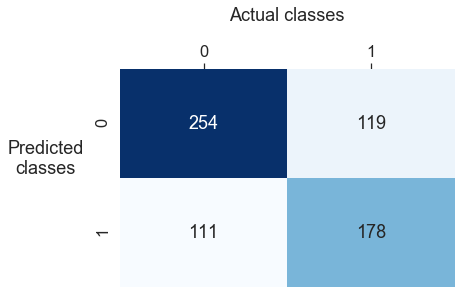

In [307]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots()
sns.heatmap(table, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual classes', labelpad=-280)
ax.set_ylabel('Predicted\nclasses', rotation=0, labelpad=50)
plt.show()

#### Average gnb, gbc and svm

In [243]:
start = time.process_time()

models_ss_av2 = {'gnb_best_ss':gnb_best_ss,
                 'gbc_best_ss': gbc_best_ss,
                'svm_best_ss':svm_best_ss}

validation_results_ss_av2 = pd.DataFrame()
validation_results_ss_av2['actual'] = y_validation

for model in models_ss_av2:
    models_ss_av2[model].fit(x_train_ss, y_train)
    y_pred = models_ss_av2[model].predict_proba(x_validation_ss)
    prob_1 = []
    for prob in np.arange(0, len(y_pred)):
        prob_1.append(y_pred[prob][1])
    validation_results_ss_av2[model] = prob_1
validation_results_ss_av2['average_prob'] = (validation_results_ss_av2['gnb_best_ss'] + validation_results_ss_av2['svm_best_ss'] + validation_results_ss_av2['gbc_best_ss']) / 3
validation_results_ss_av2['average_y'] = np.where(validation_results_ss_av2['average_prob'] > 0.5, 1, 0)
    
time.process_time() - start

6.069205000000011

In [244]:
table = pd.crosstab(validation_results_ss_av2['average_y'], validation_results_ss_av2['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')

actual       0    1
average_y          
0           78   25
1          287  272
True positives: 272
True negatives: 78
False positives: 287
False negatives: 25
Accuracy: 0.5287009063444109
Precision: 0.4865831842576029
Recall: 0.9158249158249159
F1: 0.6355140186915887





In [263]:
precision_3_ss, recall_3_ss, thresholds_3_ss = precision_recall_curve(y_validation, validation_results_ss_av2['average_prob'])

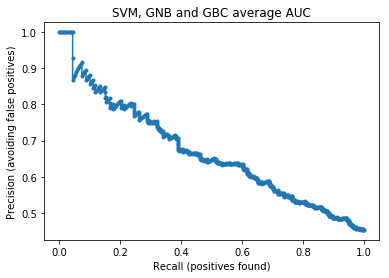

In [264]:
plt.plot(recall_3_ss, precision_3_ss, marker='.')
plt.xlabel('Recall (positives found)')
plt.ylabel('Precision (avoiding false positives)')
plt.title('SVM, GNB and GBC average AUC')
plt.show()

In [271]:
validation_results_ss_av2['average_y2'] = np.where(validation_results_ss_av2['average_prob'] > 0.63, 1, 0)

table = pd.crosstab(validation_results_ss_av2['average_y2'], validation_results_ss_av2['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')

actual        0    1
average_y2          
0           255  117
1           110  180
True positives: 180
True negatives: 255
False positives: 110
False negatives: 117
Accuracy: 0.6570996978851964
Precision: 0.6206896551724138
Recall: 0.6060606060606061
F1: 0.6132879045996593





#### Min Max Scaler

In [272]:
knn_best_mm = KNeighborsClassifier(n_neighbors = 8,
                                   weights='distance')
gnb_best_mm = GaussianNB()
rfc_best_mm = RandomForestClassifier(random_state=5322,
                                  class_weight='balanced',
                                  n_estimators=100,
                                  max_depth=4,
                                  max_features=None,
                                  criterion='entropy')
gbc_best_mm = GradientBoostingClassifier(random_state=5322,
                                      loss='exponential',
                                      learning_rate=0.1,
                                      max_depth=4,
                                      max_features=None)
svm_best_mm = SVC(random_state= 5322, C=10, gamma=0.1)

models_mm = {'knn_best_mm':knn_best_mm,
          'gnb_best_mm':gnb_best_mm, 
          'rfc_best_mm':rfc_best_mm, 
          'gbc_best_mm':gbc_best_mm,
            'svm_best_mm': svm_best_mm}

In [273]:
start = time.process_time()

validation_results_mm = pd.DataFrame()
validation_results_mm['actual'] = y_validation

for model in models_mm:
    models_mm[model].fit(x_train_mm, y_train)
    y_pred = models_mm[model].predict(x_validation_mm)
    validation_results_mm[model] = y_pred
    
time.process_time() - start

3.9253349999999614

In [274]:
for model in models_mm:
    table = pd.crosstab(validation_results_mm[model], validation_results_mm['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')

actual         0    1
knn_best_mm          
0            260  183
1            105  114
True positives: 114
True negatives: 260
False positives: 105
False negatives: 183
Accuracy: 0.5649546827794562
Precision: 0.5205479452054794
Recall: 0.3838383838383838
F1: 0.4418604651162791



actual         0    1
gnb_best_mm          
0             35   18
1            330  279
True positives: 279
True negatives: 35
False positives: 330
False negatives: 18
Accuracy: 0.4743202416918429
Precision: 0.458128078817734
Recall: 0.9393939393939394
F1: 0.6158940397350994



actual         0    1
rfc_best_mm          
0            187   69
1            178  228
True positives: 228
True negatives: 187
False positives: 178
False negatives: 69
Accuracy: 0.6268882175226587
Precision: 0.5615763546798029
Recall: 0.7676767676767676
F1: 0.6486486486486486



actual         0    1
gbc_best_mm          
0            268  140
1             97  157
True positives: 157
True negatives: 268
False positives: 97
False nega

#### Standard Scaler PCA

In [275]:
start = time.process_time()

validation_results_ss_pca = pd.DataFrame()
validation_results_ss_pca['actual'] = y_validation

for model in models_ss:
    models_ss[model].fit(x_train_ss_pca, y_train)
    y_pred = models_ss[model].predict(x_validation_ss_pca)
    validation_results_ss_pca[model] = y_pred
    
time.process_time() - start

1.0606440000000248

In [276]:
for model in models_ss:
    table = pd.crosstab(validation_results_ss_pca[model], validation_results_ss_pca['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')

actual         0    1
knn_best_ss          
0            221  166
1            144  131
True positives: 131
True negatives: 221
False positives: 144
False negatives: 166
Accuracy: 0.5317220543806647
Precision: 0.4763636363636364
Recall: 0.44107744107744107
F1: 0.458041958041958



actual         0    1
gnb_best_ss          
0            264  181
1            101  116
True positives: 116
True negatives: 264
False positives: 101
False negatives: 181
Accuracy: 0.5740181268882175
Precision: 0.5345622119815668
Recall: 0.39057239057239057
F1: 0.45136186770428016



actual         0    1
rfc_best_ss          
0            208  121
1            157  176
True positives: 176
True negatives: 208
False positives: 157
False negatives: 121
Accuracy: 0.5800604229607251
Precision: 0.5285285285285285
Recall: 0.5925925925925926
F1: 0.5587301587301586



actual         0    1
gbc_best_ss          
0            244  163
1            121  134
True positives: 134
True negatives: 244
False positives: 121
Fal

#### Min Max Scaler PCA

In [277]:
start = time.process_time()

validation_results_mm_pca = pd.DataFrame()
validation_results_mm_pca['actual'] = y_validation

for model in models_mm:
    models_mm[model].fit(x_train_mm_pca, y_train)
    y_pred = models_mm[model].predict(x_validation_mm_pca)
    validation_results_mm_pca[model] = y_pred
    
time.process_time() - start

0.9747249999999781

In [278]:
for model in models_mm:
    table = pd.crosstab(validation_results_mm_pca[model], validation_results_mm_pca['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')

actual         0    1
knn_best_mm          
0            238  163
1            127  134
True positives: 134
True negatives: 238
False positives: 127
False negatives: 163
Accuracy: 0.5619335347432024
Precision: 0.5134099616858238
Recall: 0.4511784511784512
F1: 0.48028673835125446



actual         0    1
gnb_best_mm          
0            270  175
1             95  122
True positives: 122
True negatives: 270
False positives: 95
False negatives: 175
Accuracy: 0.5921450151057401
Precision: 0.5622119815668203
Recall: 0.4107744107744108
F1: 0.4747081712062257



actual         0    1
rfc_best_mm          
0            232  136
1            133  161
True positives: 161
True negatives: 232
False positives: 133
False negatives: 136
Accuracy: 0.5936555891238671
Precision: 0.5476190476190477
Recall: 0.5420875420875421
F1: 0.544839255499154



actual         0    1
gbc_best_mm          
0            250  161
1            115  136
True positives: 136
True negatives: 250
False positives: 115
False 

## Best training models only

In [326]:
knn_best = KNeighborsClassifier(n_neighbors = 18,
                                weights='distance')
gnb_best = GaussianNB()
rfc_best = RandomForestClassifier(random_state=5322,
                                  class_weight='balanced',
                                  n_estimators=100,
                                  max_depth=4,
                                  max_features=None,
                                  criterion='entropy')
gbc_best = GradientBoostingClassifier(random_state=5322,
                                      loss='exponential',
                                      learning_rate=0.1,
                                      max_depth=4,
                                      max_features=None)
svm_best = SVC(random_state= 5322, C=10, gamma=0.0005, probability=True)

best_models = {'knn_best':knn_best,
          'gnb_best':gnb_best, 
          'rfc_best':rfc_best, 
          'gbc_best':gbc_best,
          'svm_best':svm_best}

best_data = {'knn_best': x_train,
             'gnb_best': x_train_ss,
             'rfc_best': x_train,
             'gbc_best': x_train,
             'svm_best': x_train} 
best_data_v = {'knn_best': x_validation,
             'gnb_best': x_validation_ss,
             'rfc_best': x_validation,
             'gbc_best': x_validation,
             'svm_best': x_validation}

In [327]:
start = time.process_time()

validation_best_results = pd.DataFrame()
validation_best_results['actual'] = y_validation
validation_best_results['guessing'] = np.array(0) *(len(y_validation))

for model in best_models:
    best_models[model].fit(best_data[model], y_train)
    y_pred = best_models[model].predict(best_data_v[model])
    validation_best_results[model] = y_pred
    
time.process_time() - start

6.8015589999999975

In [328]:
validation_best_results['gnb_best'].sum()

628

actual      0    1
knn_best          
0         249  142
1         116  155
True positives: 155
True negatives: 249
False positives: 116
False negatives: 142
Accuracy: 0.6102719033232629
Precision: 0.5719557195571956
Recall: 0.5218855218855218
F1: 0.5457746478873239





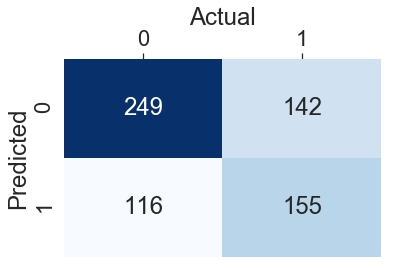

actual      0    1
gnb_best          
0          24   10
1         341  287
True positives: 287
True negatives: 24
False positives: 341
False negatives: 10
Accuracy: 0.4697885196374622
Precision: 0.4570063694267516
Recall: 0.9663299663299664
F1: 0.6205405405405406





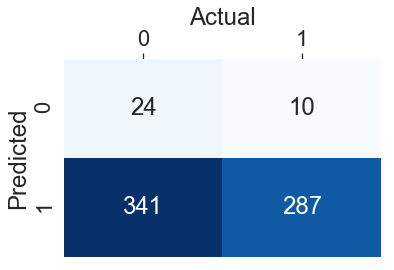

actual      0    1
rfc_best          
0         187   69
1         178  228
True positives: 228
True negatives: 187
False positives: 178
False negatives: 69
Accuracy: 0.6268882175226587
Precision: 0.5615763546798029
Recall: 0.7676767676767676
F1: 0.6486486486486486





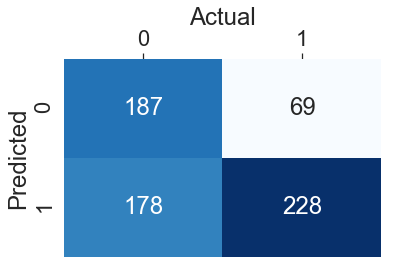

actual      0    1
gbc_best          
0         268  140
1          97  157
True positives: 157
True negatives: 268
False positives: 97
False negatives: 140
Accuracy: 0.6419939577039275
Precision: 0.6181102362204725
Recall: 0.5286195286195287
F1: 0.5698729582577132





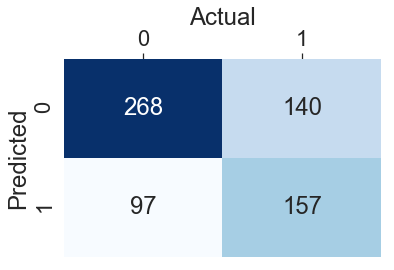

actual      0    1
svm_best          
0         267  132
1          98  165
True positives: 165
True negatives: 267
False positives: 98
False negatives: 132
Accuracy: 0.6525679758308157
Precision: 0.6273764258555133
Recall: 0.5555555555555556
F1: 0.5892857142857144





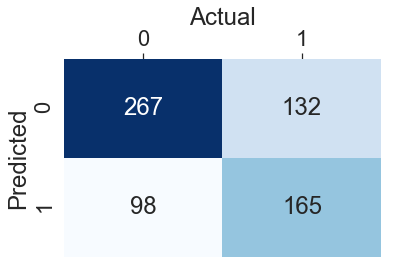

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


actual      0    1
guessing          
0         365  297
True positives: 0
True negatives: 365
False positives: 0
False negatives: 297
Accuracy: 0.5513595166163142
Precision: 0
Recall: 0.0
F1: nan





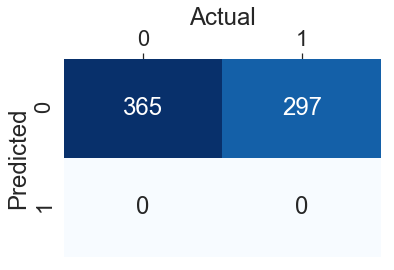

In [346]:
for model in best_models:
    table = pd.crosstab(validation_best_results[model], validation_best_results['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')
    x = str(model) + '_cm.pdf'
    sns.set(font_scale=2)
    fig, ax = plt.subplots()
    sns.heatmap(table, cmap='Blues', annot=True, fmt='g', cbar=False)
    ax.xaxis.tick_top()
    ax.set_xlabel('Actual', labelpad=-250)
    ax.set_ylabel('Predicted')
    plt.tight_layout()
    plt.savefig(x)
    plt.show()
table = pd.crosstab(validation_best_results['guessing'], validation_best_results['actual'])
tp = 0
tn = table.iloc[0, 0]
fp = 0
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = 0
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')
x=str('guessing_cm.pdf')
guessing_table = pd.DataFrame({
    0: [tn, fp],
    1: [fn, tp]
})
sns.set(font_scale=2)
fig, ax = plt.subplots()
sns.heatmap(guessing_table, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual', labelpad=-250)
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.savefig(x)
plt.show()

### Average rfc and svm

In [347]:
start = time.process_time()

best_models_av = {'rfc_best':rfc_best, 
                  'svm_best':svm_best}

validation_best_results_av = pd.DataFrame()
validation_best_results_av['actual'] = y_validation

for model in best_models_av:
    best_models_av[model].fit(x_train, y_train)
    y_pred = best_models_av[model].predict_proba(x_validation)
    prob_1 = []
    for prob in np.arange(0, len(y_pred)):
        prob_1.append(y_pred[prob][1])
    validation_best_results_av[model] = prob_1
validation_best_results_av['average_prob'] = (validation_best_results_av['rfc_best'] + validation_best_results_av['svm_best']) / 2
validation_best_results_av['average_y'] = np.where(validation_best_results_av['average_prob'] > 0.5, 1, 0)
    
time.process_time() - start

6.566310999999985

actual       0    1
average_y          
0          248  115
1          117  182
True positives: 182
True negatives: 248
False positives: 117
False negatives: 115
Accuracy: 0.649546827794562
Precision: 0.6086956521739131
Recall: 0.6127946127946128
F1: 0.6107382550335569





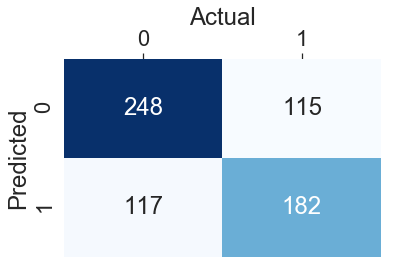

In [348]:
table = pd.crosstab(validation_best_results_av['average_y'], validation_best_results_av['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')
x=str('rfc_svm_av_cm.pdf')
sns.set(font_scale=2)
fig, ax = plt.subplots()
sns.heatmap(table, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual', labelpad=-250)
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.savefig(x)
plt.show()

actual      0    1
knn_best          
0         249  142
1         116  155
True positives: 155
True negatives: 249
False positives: 116
False negatives: 142
Accuracy: 0.6102719033232629
Precision: 0.5719557195571956
Recall: 0.5218855218855218
F1: 0.5457746478873239





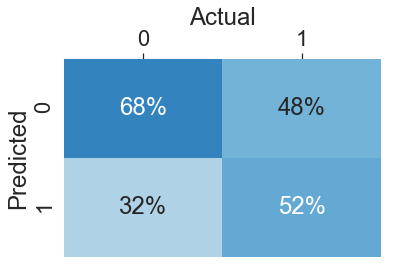

actual      0    1
gnb_best          
0          24   10
1         341  287
True positives: 287
True negatives: 24
False positives: 341
False negatives: 10
Accuracy: 0.4697885196374622
Precision: 0.4570063694267516
Recall: 0.9663299663299664
F1: 0.6205405405405406





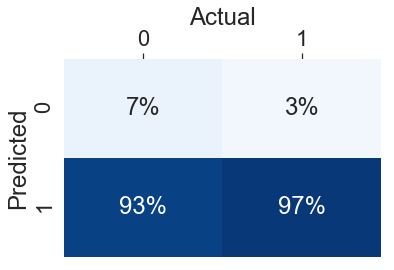

actual      0    1
rfc_best          
0         187   69
1         178  228
True positives: 228
True negatives: 187
False positives: 178
False negatives: 69
Accuracy: 0.6268882175226587
Precision: 0.5615763546798029
Recall: 0.7676767676767676
F1: 0.6486486486486486





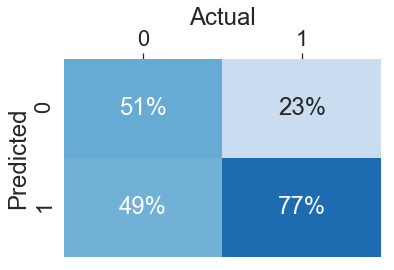

actual      0    1
gbc_best          
0         268  140
1          97  157
True positives: 157
True negatives: 268
False positives: 97
False negatives: 140
Accuracy: 0.6419939577039275
Precision: 0.6181102362204725
Recall: 0.5286195286195287
F1: 0.5698729582577132





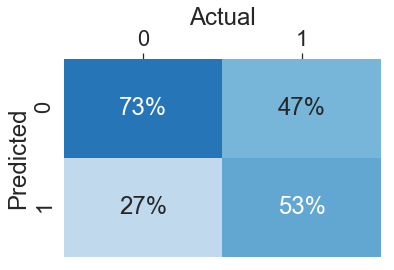

actual      0    1
svm_best          
0         267  132
1          98  165
True positives: 165
True negatives: 267
False positives: 98
False negatives: 132
Accuracy: 0.6525679758308157
Precision: 0.6273764258555133
Recall: 0.5555555555555556
F1: 0.5892857142857144





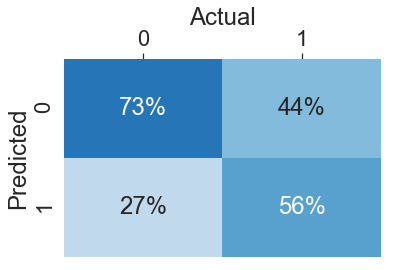

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


actual      0    1
guessing          
0         365  297
True positives: 0
True negatives: 365
False positives: 0
False negatives: 297
Accuracy: 0.5513595166163142
Precision: 0
Recall: 0.0
F1: nan





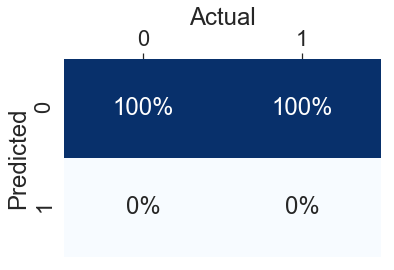

actual       0    1
average_y          
0          248  115
1          117  182
True positives: 182
True negatives: 248
False positives: 117
False negatives: 115
Accuracy: 0.649546827794562
Precision: 0.6086956521739131
Recall: 0.6127946127946128
F1: 0.6107382550335569





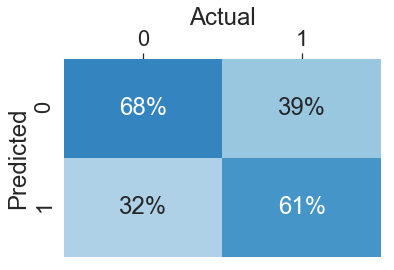

In [371]:
actual_1 = validation_best_results['actual'].sum()
actual_0 = len(validation_best_results['actual']) - actual_1

for model in best_models:
    table = pd.crosstab(validation_best_results[model], validation_best_results['actual'])
    tp = table.iloc[1, 1]
    tn = table.iloc[0, 0]
    fp = table.iloc[1, 0]
    fn = table.iloc[0, 1]
    accuracy = (tp + tn)/(tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall = tp/(tp+fn)
    f1 = 2* (precision * recall) / (precision + recall)
    print(table)
    print('True positives:', tp)
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('\n\n')
    x = str(model) + '_pct_cm.pdf'
    pct_table = pd.DataFrame({
        0: [tn/actual_0, fp/actual_0],
        1: [fn/actual_1, tp/actual_1]
    })
    sns.set(font_scale=2)
    fig, ax = plt.subplots()
    sns.heatmap(pct_table, vmin=0, vmax=1, fmt='.0%', cmap='Blues', annot=True, cbar=False)
    ax.xaxis.tick_top()
    ax.set_xlabel('Actual', labelpad=-250)
    ax.set_ylabel('Predicted')
    plt.tight_layout()
    plt.savefig(x)
    plt.show()
table = pd.crosstab(validation_best_results['guessing'], validation_best_results['actual'])
tp = 0
tn = table.iloc[0, 0]
fp = 0
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = 0
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')
x=str('guessing_pct_cm.pdf')
pct_table = pd.DataFrame({
    0: [tn/actual_0, fp/actual_0],
    1: [fn/actual_1, tp/actual_1]
})
sns.set(font_scale=2)
fig, ax = plt.subplots()
sns.heatmap(pct_table, vmin=0, vmax=1, cmap='Blues', annot=True, fmt='.0%', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual', labelpad=-250)
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.savefig(x)
plt.show()
table = pd.crosstab(validation_best_results_av['average_y'], validation_best_results_av['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')
x=str('rfc_svm_val_pct_cm.pdf')
pct_table = pd.DataFrame({
    0: [tn/actual_0, fp/actual_0],
    1: [fn/actual_1, tp/actual_1]
})
sns.set(font_scale=2)
fig, ax = plt.subplots()
sns.heatmap(pct_table, vmin=0, vmax=1, cmap='Blues', annot=True, fmt='.0%', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual', labelpad=-250)
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.savefig(x)
plt.show()

## Testing set!!!

In [353]:
x_train_val = pd.concat([x_train, x_validation], axis=0)
y_train_val = pd.concat([y_train, y_validation], axis=0)

In [354]:
start = time.process_time()

best_model = {'rfc_best':rfc_best, 
              'svm_best':svm_best}

test_results = pd.DataFrame()
test_results['actual'] = y_test

for model in best_model:
    best_model[model].fit(x_train_val, y_train_val)
    y_pred = best_model[model].predict_proba(x_test)
    prob_1 = []
    for prob in np.arange(0, len(y_pred)):
        prob_1.append(y_pred[prob][1])
    test_results[model] = prob_1
test_results['average_prob'] = (test_results['rfc_best'] + test_results['svm_best']) / 2
test_results['average_y'] = np.where(test_results['average_prob'] > 0.5, 1, 0)
    
time.process_time() - start

11.18208500000003

In [421]:
len(x_train_val)

2648

In [422]:
len(x_test)

663

actual       0    1
average_y          
0          237  118
1          128  180
True positives: 180
True negatives: 237
False positives: 128
False negatives: 118
Accuracy: 0.6289592760180995
Precision: 0.5844155844155844
Recall: 0.6040268456375839
F1: 0.594059405940594





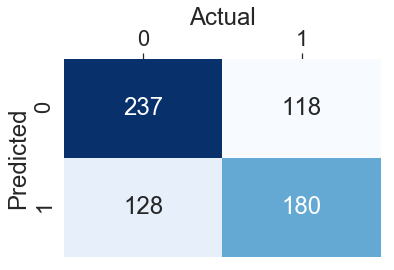

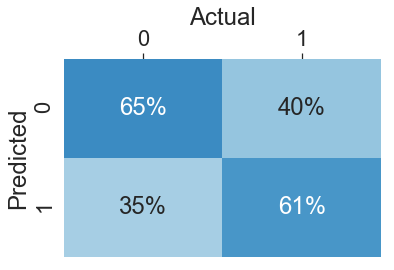

In [356]:
table = pd.crosstab(test_results['average_y'], test_results['actual'])
tp = table.iloc[1, 1]
tn = table.iloc[0, 0]
fp = table.iloc[1, 0]
fn = table.iloc[0, 1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp/(tp+fn)
f1 = 2* (precision * recall) / (precision + recall)
print(table)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('\n\n')
x=str('rfc_svm_test_cm.pdf')
sns.set(font_scale=2)
fig, ax = plt.subplots()
sns.heatmap(table, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual', labelpad=-250)
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.savefig(x)
plt.show()
x2=str('rfc_svm_test_pct_cm.pdf')
pct_table = pd.DataFrame({
    0: [tn/actual_0, fp/actual_0],
    1: [fn/actual_1, tp/actual_1]
})
sns.set(font_scale=2)
fig, ax = plt.subplots()
sns.heatmap(pct_table, vmin=0, vmax=1, cmap='Blues', annot=True, fmt='.0%', cbar=False)
ax.xaxis.tick_top()
ax.set_xlabel('Actual', labelpad=-250)
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.savefig(x2)
plt.show()

In [367]:
actual_test_1 = y_test.sum()
actual_test_0 = len(y_test) - actual_test_1
total = len(y_test)
print('actual 0: {} or {:.0%}'.format(actual_test_0, actual_test_0/total))
print('actual 1:', actual_test_1, 'or {:.0%}'.format(actual_test_1/total))

actual 0: 365 or 55%
actual 1: 298 or 45%


## Comparison plot

In [372]:
validation_best_results_av.head()

,actual,rfc_best,svm_best,average_prob,average_y
1178,0,0.157453,0.128294,0.142874,0
2064,1,0.594422,0.663102,0.628762,1
2521,0,0.265339,0.144917,0.205128,0
3208,0,0.605942,0.529481,0.567711,1
1411,1,0.584058,0.714549,0.649303,1


In [400]:
table_val = pd.crosstab(validation_best_results_av['average_y'], validation_best_results_av['actual'])
tp_val = table_val.iloc[1, 1]
tn_val = table_val.iloc[0, 0]
fp_val = table_val.iloc[1, 0]
fn_val = table_val.iloc[0, 1]
accuracy_val = (tp_val + tn_val)/(tp_val+tn_val+fp_val+fn_val)
precision_val = tp_val / (tp_val+fp_val)
recall_val = tp_val/(tp_val+fn_val)
f1_val = 2* (precision_val * recall_val) / (precision_val + recall_val)

table_test = pd.crosstab(test_results['average_y'], test_results['actual'])
tp_test = table_test.iloc[1, 1]
tn_test = table_test.iloc[0, 0]
fp_test = table_test.iloc[1, 0]
fn_test = table_test.iloc[0, 1]
accuracy_test = (tp_test + tn_test)/(tp_test+tn_test+fp_test+fn_test)
precision_test = tp_test / (tp_test+fp_test)
recall_test = tp_test/(tp_test+fn_test)
f1_test = 2* (precision_test * recall_test) / (precision_test + recall_test)

val_test = pd.DataFrame({
    'stage': ['Validation', 'Testing'],
    'f1': [f1_val, f1_test],
    'Accuracy': [accuracy_val, accuracy_test],
    'Guessing': [actual_test_0/total, actual_test_0/total]
})
val_test.set_index(['stage'], drop=True, inplace=True)

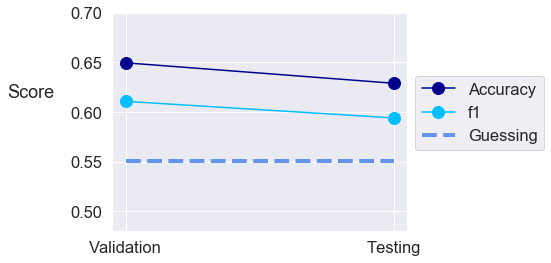

In [415]:
fig = plt.figure(figsize=(8, 4))

sns.set(font_scale=1.5)

plt.plot(val_test['Accuracy'], marker='o', markersize=12, color='darkblue')
plt.plot(val_test['f1'], marker='o', markersize=12, color='deepskyblue')
plt.plot(val_test['Guessing'], linestyle='--', linewidth=4, color='cornflowerblue')
plt.ylim(0.48, 0.7)
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left')
plt.ylabel('Score\n', rotation=0, labelpad=40)
plt.tight_layout()
plt.savefig('accuracy_change.pdf')
plt.show()

In [423]:
importances = pd.DataFrame()
importances['features'] = x_train.columns

rfc_best.fit(x_train_val, y_train_val)
feat_imp = rfc_best.feature_importances_
importances['rfc_score'] = feat_imp

#svm_best.fit(x_train_val, y_train_val)
#feat_imp = svm_best.coef_
#importances['svm_score'] = feat_imp


In [424]:
importances.sort_values('rfc_score', ascending=False)

,features,rfc_score
0,age,0.416079
16,age_1st_child_under_21,0.062542
4,happy,0.061383
140,class_middle_class,0.043608
139,class_lower_class,0.037409
65,family_16_both_parents,0.030914
181,income_log,0.028953
52,education_bachelor,0.019386
180,place_size_000s_log,0.019305
178,children_log,0.016931
